<a href="https://colab.research.google.com/github/LazaroR-u/Quantum_Computing/blob/main/21_09_CNF_QML_FeQ02_16_875_18_625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementacion de redes neuronales cuanticas a rayos cosmicos

En este notebook se realiza la implementacion de un modelo de redes neuronales densas a una simulacion de rayos cosmicos obtenida del software CONEX, la lluvia de rayos cosmicos corresponden al tipo Proton usando el modelo

In [ ]:
pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.5/334.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 707.5/707.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00


In [ ]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import glob
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau#, NanChecker
from keras.models import Sequential, Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
#from keras.optimizers import Adam, SGD
import os
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [ ]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=1fd47ebbd068af7ef4d514939d11f66411a055b16f5f8ac13b9c467282e28232
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
path_file= "C:/Users/Lazaro Diaz/Documents/CONGRESO/data/FeQ02-16.875-18.625.root"
f=uproot.open(path_file)

f.keys()



['Header;1', 'Shower;1']

In [ ]:
header = f['Header']
Shower = f["Shower"]

In [ ]:
header
branches_header = header.keys()

for branch in branches_header:
    print(f"{branch:20s} {header[branch]}")

Seed1                <TBranch 'Seed1' at 0x01e0987198e0>
Particle             <TBranch 'Particle' at 0x01e0987192e0>
Alpha                <TBranch 'Alpha' at 0x01e0c1bd0790>
lgEmin               <TBranch 'lgEmin' at 0x01e0c1bd0eb0>
lgEmax               <TBranch 'lgEmax' at 0x01e0c1bda610>
zMin                 <TBranch 'zMin' at 0x01e0c1bdad30>
zMax                 <TBranch 'zMax' at 0x01e0c1bde490>
SvnRevision          <TBranch 'SvnRevision' at 0x01e0c1bdebb0>
Version              <TBranch 'Version' at 0x01e0c1be2310>
OutputVersion        <TBranch 'OutputVersion' at 0x01e0c1be2a30>
HEModel              <TBranch 'HEModel' at 0x01e0c1be6190>
LEModel              <TBranch 'LEModel' at 0x01e0c1be68b0>
HiLowEgy             <TBranch 'HiLowEgy' at 0x01e0c1be6fd0>
hadCut               <TBranch 'hadCut' at 0x01e0c1be8730>
emCut                <TBranch 'emCut' at 0x01e098713e80>
hadThr               <TBranch 'hadThr' at 0x01e0c1bdd3d0>
muThr                <TBranch 'muThr' at 0x01e0c1bddaf0>
emT

In [ ]:
Shower
branches_shower = Shower.keys()

for branch in branches_shower:
    print(f"{branch:20s} {Shower[branch]}")

lgE                  <TBranch 'lgE' at 0x01e0c1bf3790>
zenith               <TBranch 'zenith' at 0x01e0c1bf3f10>
azimuth              <TBranch 'azimuth' at 0x01e0c1bf5670>
Seed2                <TBranch 'Seed2' at 0x01e0c1bf5d90>
Seed3                <TBranch 'Seed3' at 0x01e0c1bfa4f0>
Xfirst               <TBranch 'Xfirst' at 0x01e0c1bfac10>
Hfirst               <TBranch 'Hfirst' at 0x01e0c1bff370>
XfirstIn             <TBranch 'XfirstIn' at 0x01e0c1bffa90>
altitude             <TBranch 'altitude' at 0x01e0c1c051f0>
X0                   <TBranch 'X0' at 0x01e0c1c05910>
Xmax                 <TBranch 'Xmax' at 0x01e0c1c05fd0>
Nmax                 <TBranch 'Nmax' at 0x01e0c1c0a790>
p1                   <TBranch 'p1' at 0x01e0c1c0aeb0>
p2                   <TBranch 'p2' at 0x01e0c1c10610>
p3                   <TBranch 'p3' at 0x01e0c1c10d30>
chi2                 <TBranch 'chi2' at 0x01e0c1c15490>
Xmx                  <TBranch 'Xmx' at 0x01e0c1c15bb0>
Nmx                  <TBranch 'Nmx' at 

In [ ]:
branches_shower[:19]

['lgE',
 'zenith',
 'azimuth',
 'Seed2',
 'Seed3',
 'Xfirst',
 'Hfirst',
 'XfirstIn',
 'altitude',
 'X0',
 'Xmax',
 'Nmax',
 'p1',
 'p2',
 'p3',
 'chi2',
 'Xmx',
 'Nmx',
 'XmxdEdX']

In [ ]:
lgE = Shower["lgE"]
lgE.array()

<Array [17, 17, 17, 17, ..., 18.4, 18.4, 18.4, 18.4] type='70000 * float32'>

In [ ]:
Shower["Electrons"].array()

<Array [[0, 401, ..., 7.84e+04, 7.76e+04], ...] type='70000 * var * float32'>

## Recorte de datos

Solo pudimos transformar en dataframe las primeras 20 columnas de los datos de root dado que las ultimas columnas contenian una estructura distinta a las demas, por cada fila en vez de tener un valor, contenian un conjunto de valores.

In [ ]:
data = {}
for branch_name in branches_shower[:19]:
    data[branch_name] = Shower[branch_name].array()

# Crear el DataFrame a partir del diccionario
df = pd.DataFrame(data)

In [ ]:
df

,lgE,zenith,azimuth,Seed2,Seed3,Xfirst,Hfirst,XfirstIn,altitude,X0,Xmax,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,17.018965,62.145683,0.0,2,0,4.666200,42357.078125,0.803571,0.0,-24.843546,570.239197,5.778459e+07,92.592186,-0.067881,0.000046,0.352232,566.542358,5.752066e+07,563.678284
1,17.024315,32.893509,0.0,12192693,0,4.596425,38126.535156,0.892857,0.0,-33.289776,561.587769,5.824370e+07,91.286369,-0.056130,0.000040,0.228154,559.052185,5.817509e+07,556.064331
2,17.000031,42.873138,0.0,24837462,0,4.191171,39867.132812,0.607143,0.0,-49.232376,594.114624,5.453671e+07,81.818665,-0.044783,0.000034,0.043274,593.683411,5.455253e+07,590.701111
3,17.028786,55.115772,0.0,34284918,0,5.855533,39122.421875,0.285714,0.0,-19.989582,617.661255,5.909164e+07,84.353012,-0.051793,0.000037,0.575614,613.004578,5.869229e+07,609.880859
4,16.949389,49.235756,0.0,43039435,0,14.610561,31658.964844,0.535714,0.0,-27.789558,569.540955,4.875052e+07,87.379280,-0.052736,0.000040,0.183219,567.370728,4.877441e+07,563.697876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,18.404652,49.575222,0.0,457786687,505,16.585489,30847.541016,0.875000,0.0,-28.950144,655.245972,1.455245e+09,93.471199,-0.054636,0.000031,0.678413,653.139221,1.451951e+09,651.302917
69996,18.397484,36.003567,0.0,512677599,505,9.258099,33351.066406,0.803571,0.0,-39.469212,631.457153,1.467991e+09,87.111115,-0.046031,0.000028,0.554323,629.706116,1.467130e+09,628.195007
69997,18.394222,40.530212,0.0,549811026,505,3.594782,40781.582031,0.821429,0.0,-42.217014,640.084534,1.440691e+09,87.069000,-0.049473,0.000031,0.641639,638.415161,1.441189e+09,636.810181
69998,18.425219,49.110165,0.0,588857654,505,9.692023,34472.121094,0.857143,0.0,-35.711777,642.695007,1.559379e+09,90.718750,-0.057265,0.000033,0.506944,641.337463,1.555881e+09,639.668823


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lgE       70000 non-null  float32
 1   zenith    70000 non-null  float32
 2   azimuth   70000 non-null  float32
 3   Seed2     70000 non-null  int32  
 4   Seed3     70000 non-null  int32  
 5   Xfirst    70000 non-null  float32
 6   Hfirst    70000 non-null  float32
 7   XfirstIn  70000 non-null  float32
 8   altitude  70000 non-null  float64
 9   X0        70000 non-null  float32
 10  Xmax      70000 non-null  float32
 11  Nmax      70000 non-null  float32
 12  p1        70000 non-null  float32
 13  p2        70000 non-null  float32
 14  p3        70000 non-null  float32
 15  chi2      70000 non-null  float32
 16  Xmx       70000 non-null  float32
 17  Nmx       70000 non-null  float32
 18  XmxdEdX   70000 non-null  float32
dtypes: float32(16), float64(1), int32(2)
memory usage: 5.3 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lgE,70000.0,1.772572e+01,5.050381e-01,1.687501e+01,1.728082e+01,1.771429e+01,1.816584e+01,1.862497e+01
zenith,70000.0,3.879987e+01,1.557692e+01,2.210685e-01,2.691105e+01,3.981336e+01,5.166432e+01,6.499989e+01
azimuth,70000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Seed2,70000.0,4.999710e+08,2.887997e+08,2.000000e+00,2.495680e+08,4.995330e+08,7.503992e+08,9.999564e+08
Seed3,70000.0,1.392832e+02,1.089789e+02,0.000000e+00,5.600000e+01,1.130000e+02,1.950000e+02,5.050000e+02
Xfirst,70000.0,1.129306e+01,1.124078e+01,1.289852e-03,3.269350e+00,7.844894e+00,1.561955e+01,1.153130e+02
Hfirst,70000.0,3.709093e+04,9.593159e+03,1.579638e+04,3.034195e+04,3.524412e+04,4.194627e+04,9.997342e+04
XfirstIn,70000.0,4.619219e-01,3.000433e-01,1.533723e-02,1.607144e-01,4.809533e-01,7.321429e-01,9.821429e-01
altitude,70000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
X0,70000.0,-2.563386e+01,1.977144e+01,-2.814332e+02,-3.900850e+01,-2.920430e+01,-6.833920e+00,8.294907e+01


## Visualizacion de datos: distribuciones

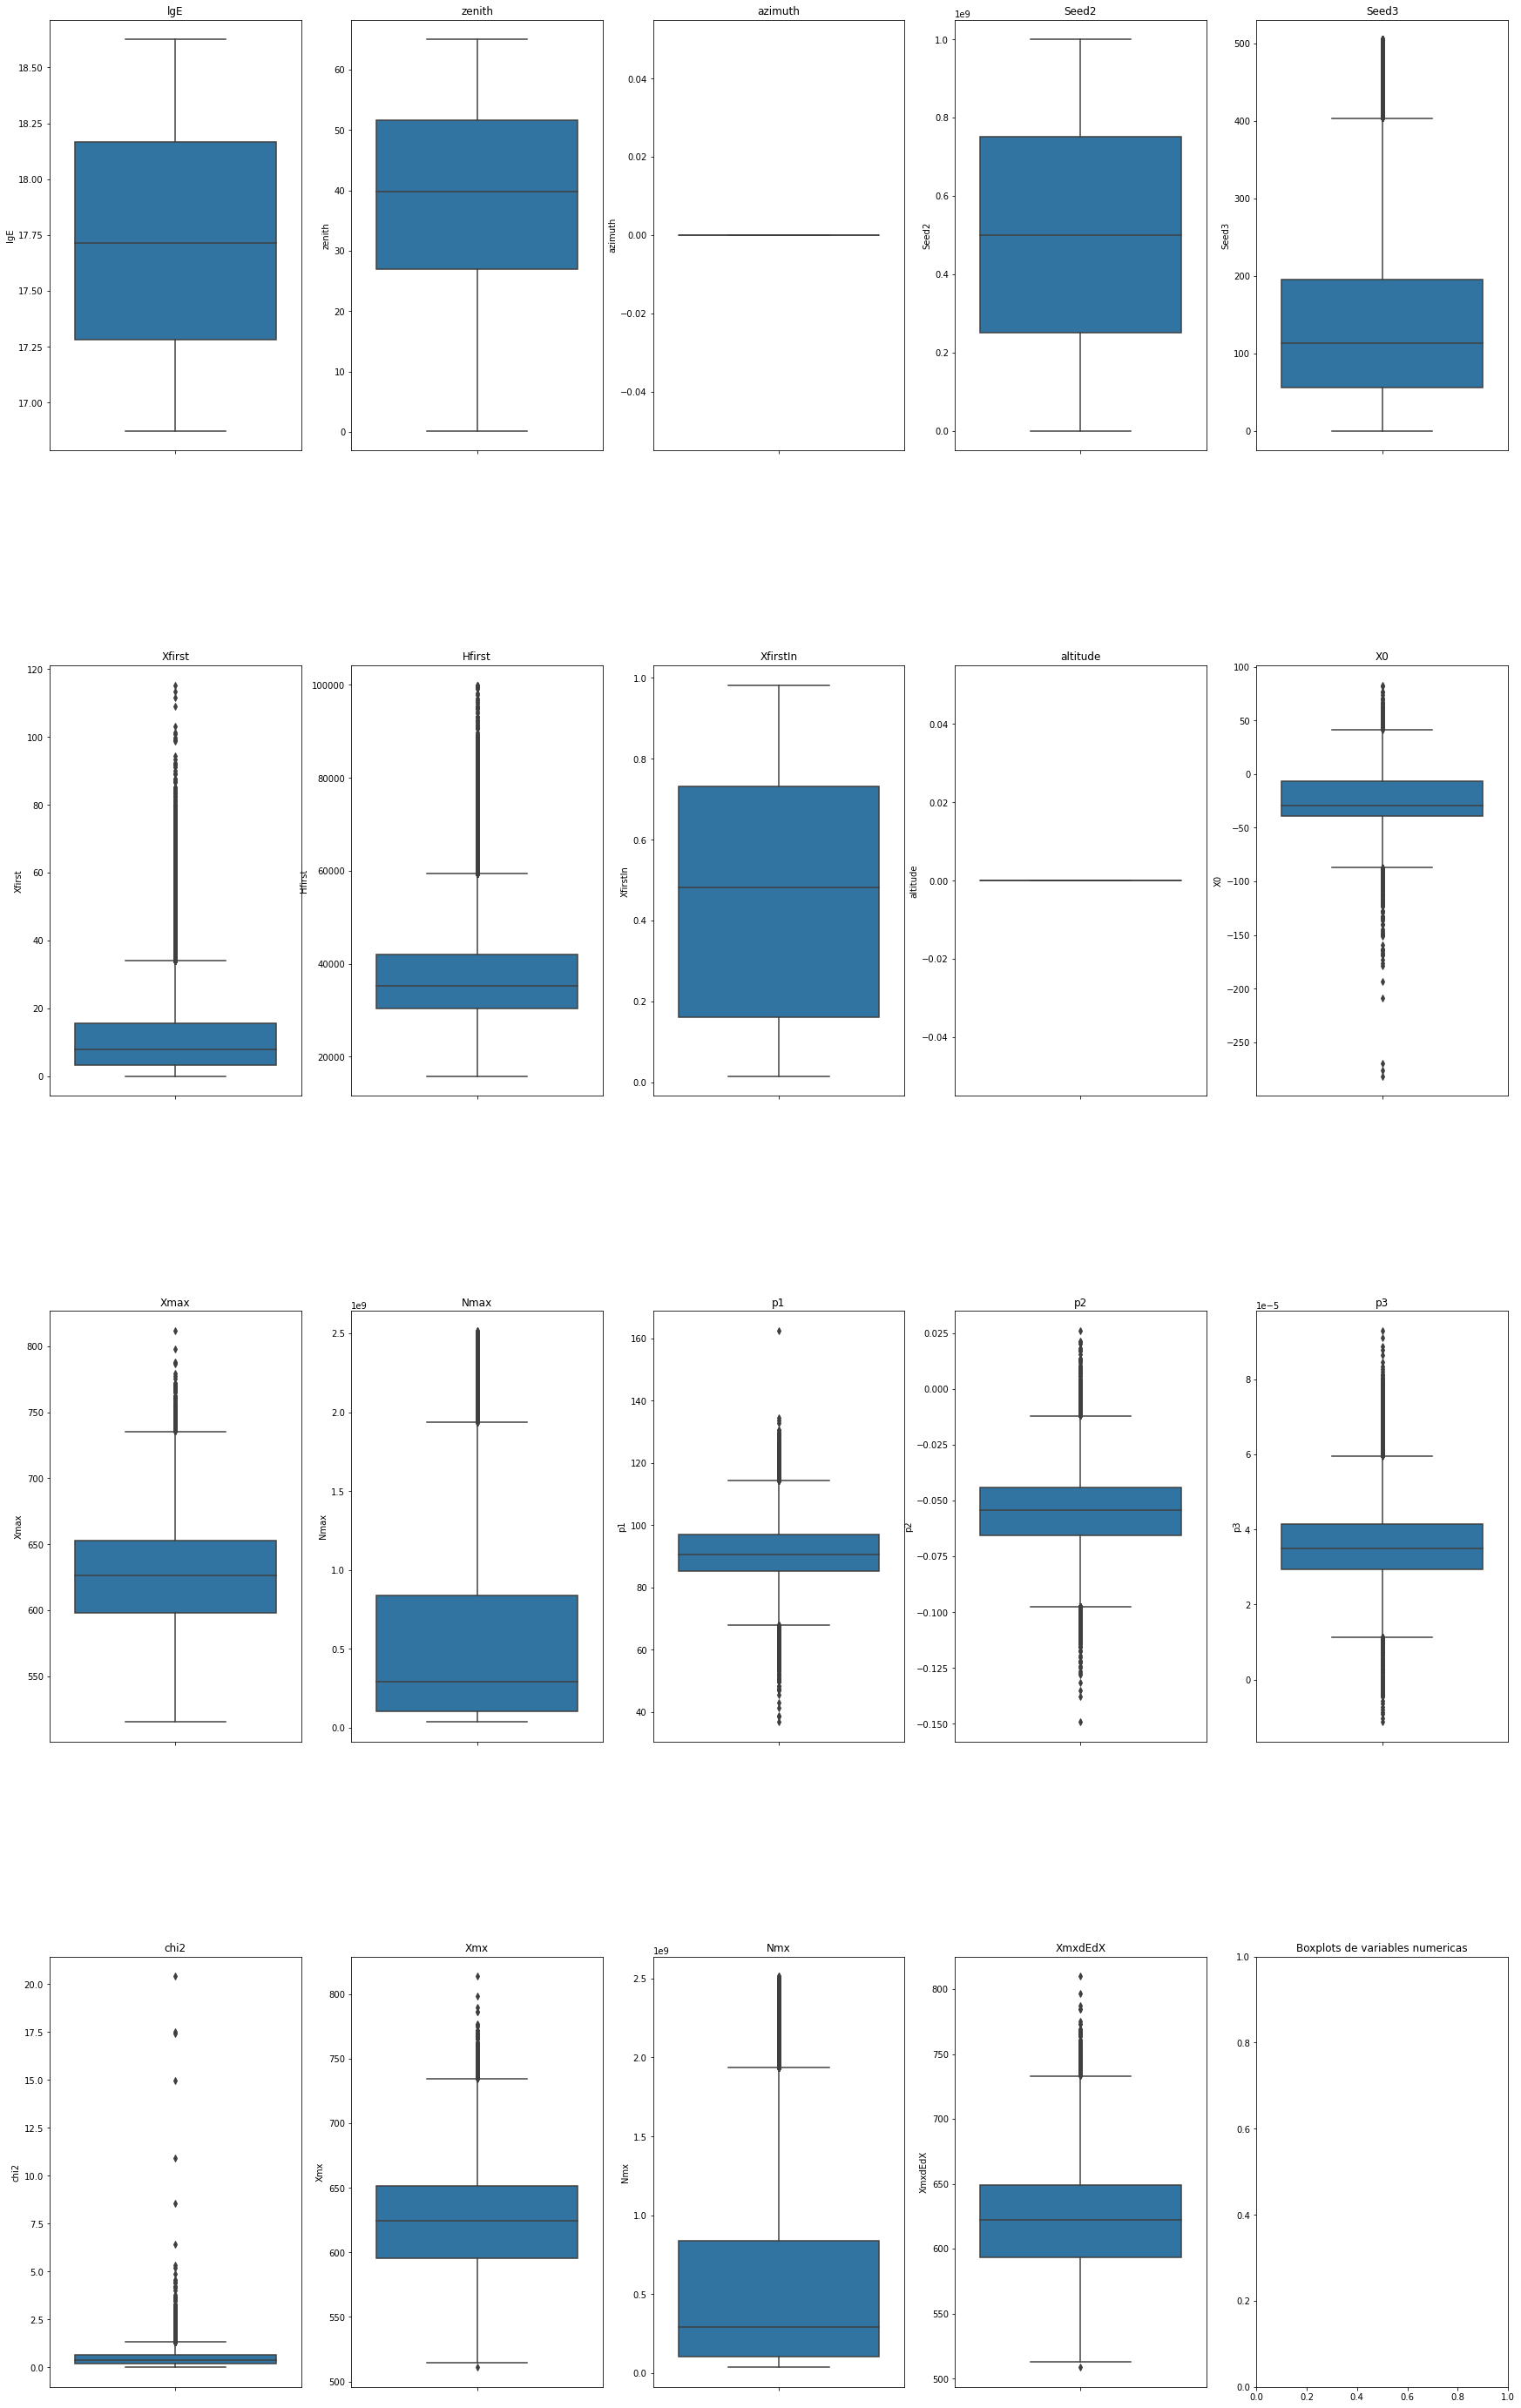

In [ ]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(4, 5, figsize=(30, 50))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

for i, column in enumerate(df.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.title('Boxplots de variables numericas')

# Muestra la figura
plt.show()

En este punto,

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#grafica con dos boxplots



In [ ]:
output.isna().sum()

No hay datos nulos pero la columna Xmax tiene datos atipicos, por lo que es necesario eliminarlos.

# Limpieza de datos y guardado en csv

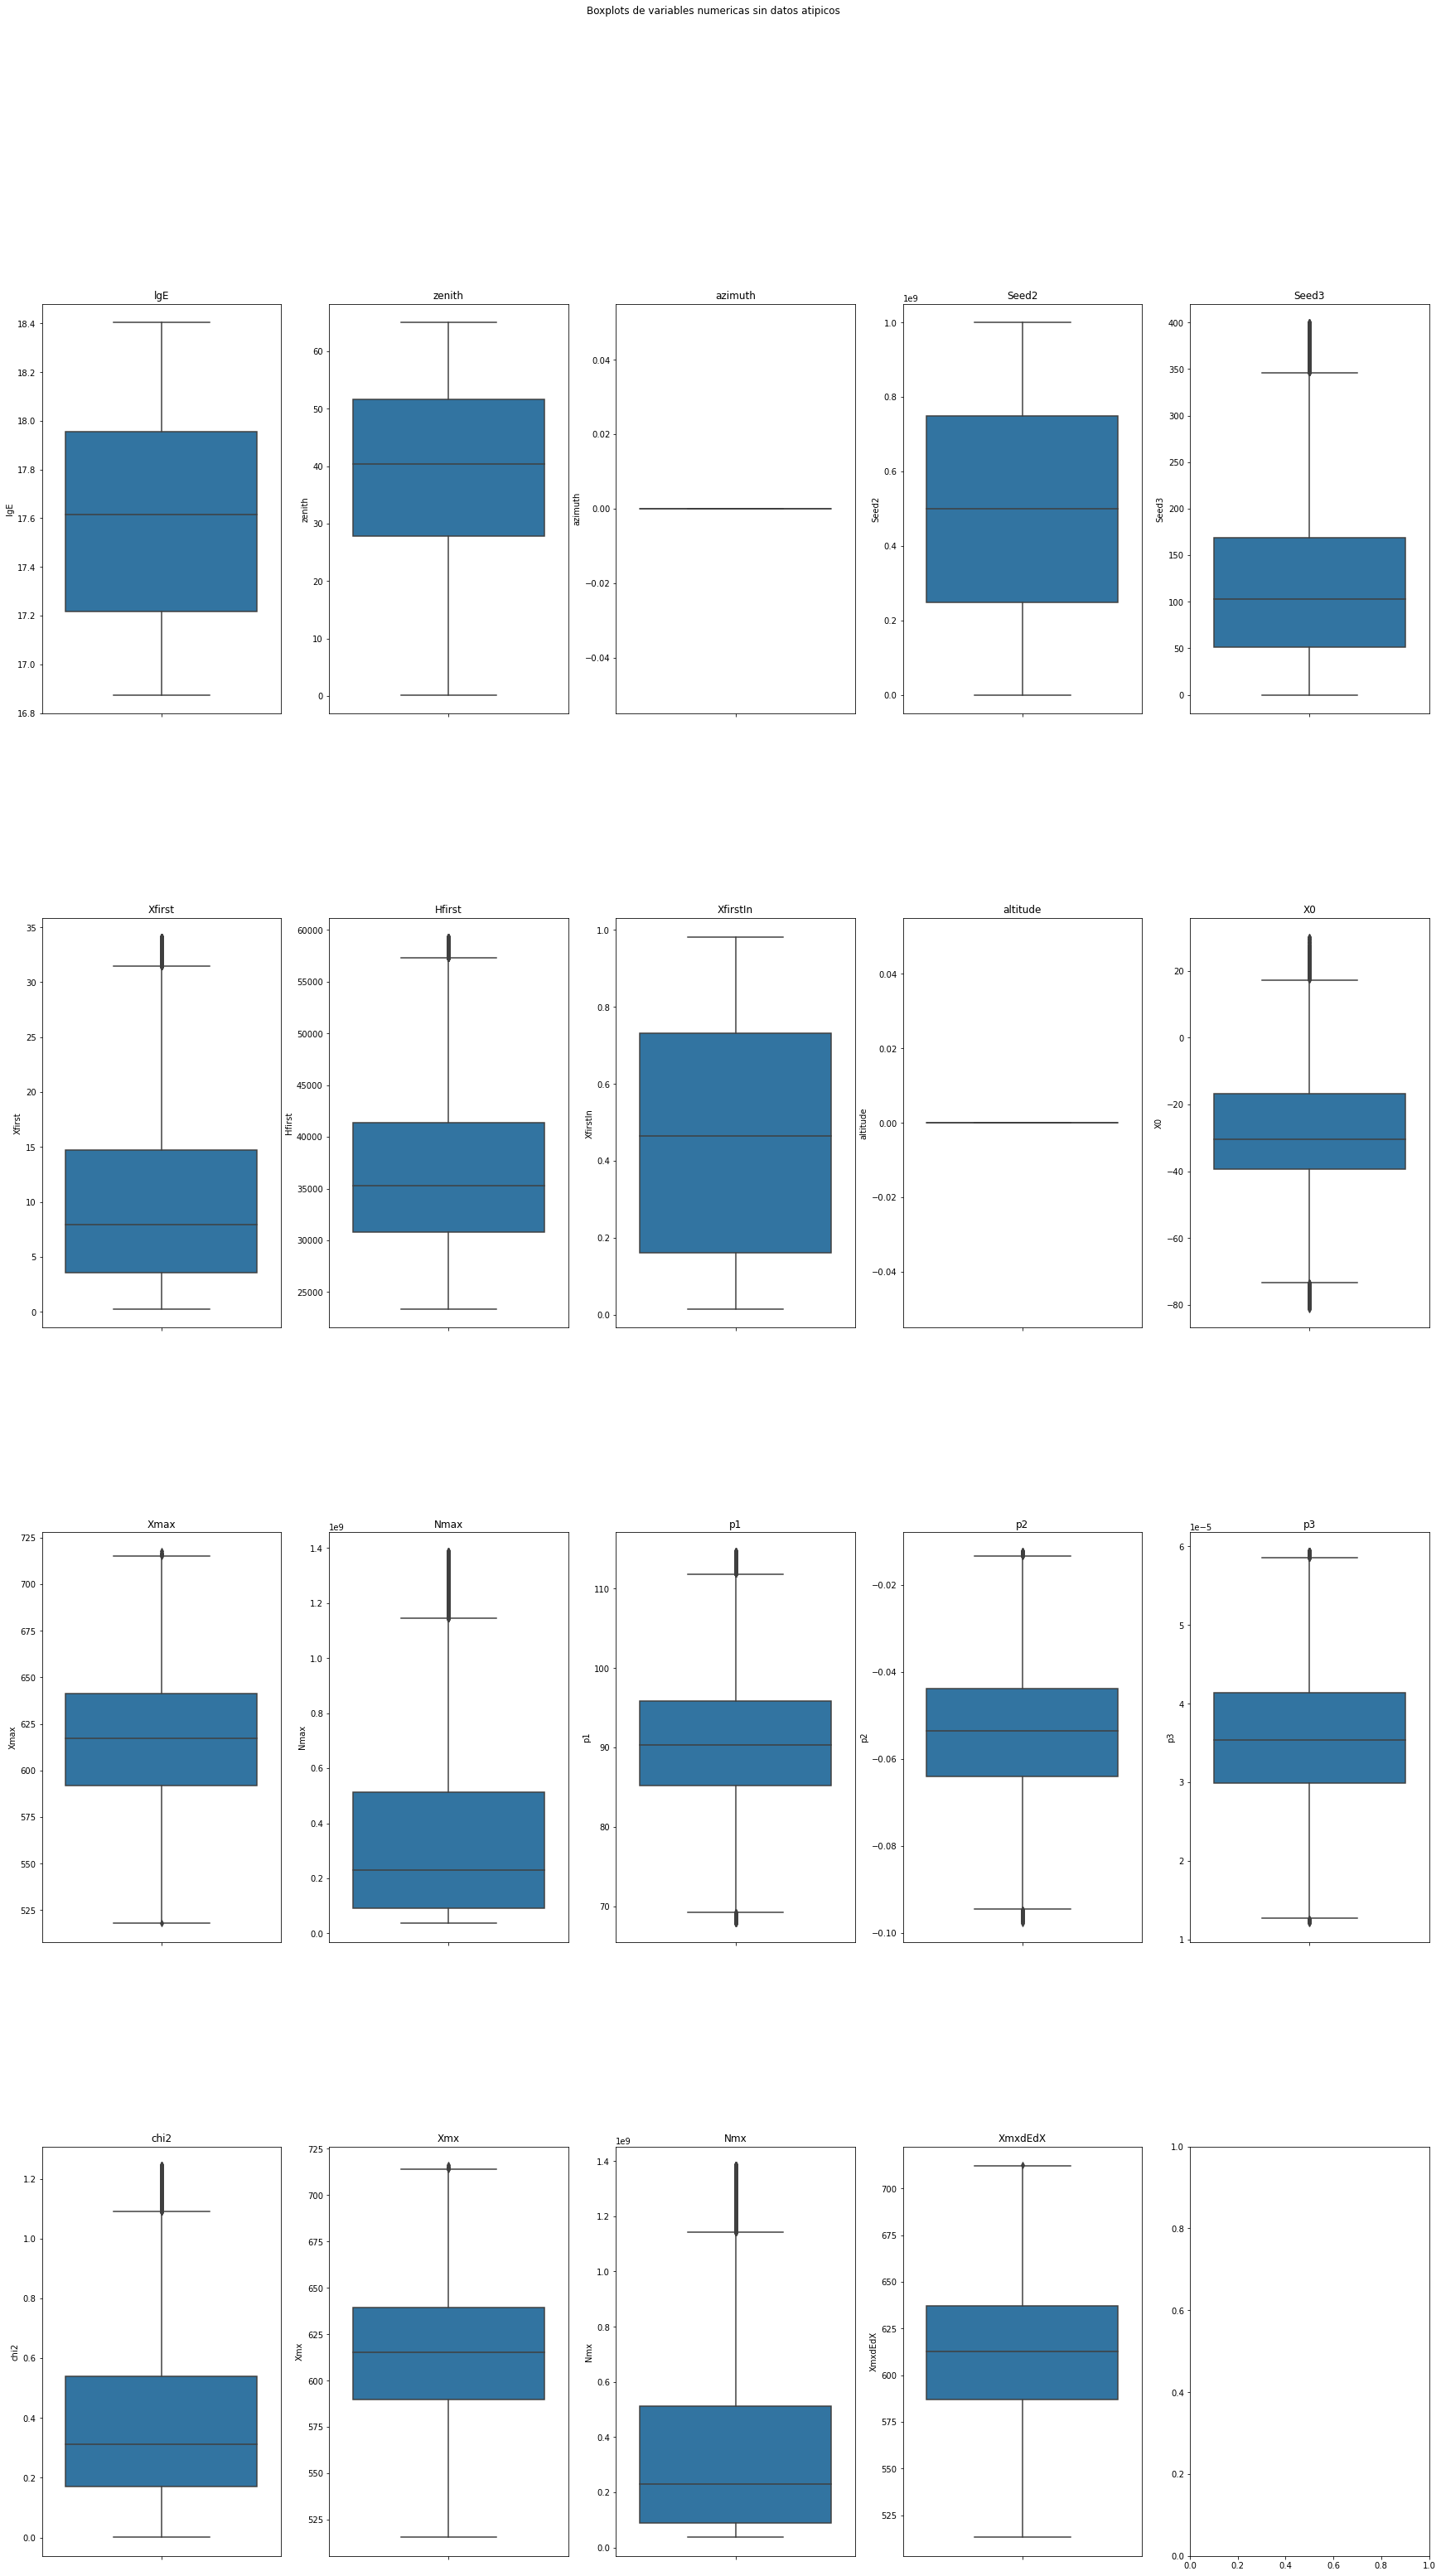

In [ ]:
def remove_outliers(df):
    threshold = 1.5

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

df_clean = remove_outliers(df)

fig, axes = plt.subplots(4, 5, figsize=(30, 50))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

for i, column in enumerate(df_clean.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df_clean, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas sin datos atipicos')

plt.show()


Una vez limpios los datos, procedemos a guardarlos en un archivo csv.

In [ ]:
df_clean = df_clean.drop(columns = ["azimuth", "altitude"])

In [ ]:
df_clean.to_csv('FeQ02-16.875-18.625_shower_clean.csv', sep='\t')

Por ultimo, podemos realizar la grafica de lgE vs Xmax.

# carga y lectura de datos csv

Empezamos leyendo el archivo csv previamente guardado y creamos una objeto con los datos del df normalizados

In [ ]:
#import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau#, NanChecker
from keras.models import Sequential, Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
#from keras.optimizers import Adam, SGD

import os
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('FeQ02-16.875-18.625_shower_clean.csv', sep="\t",header=0)

#df = df.drop(df["Unnamed: 0"], inplace = True)
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step


df.head()

,Unnamed: 0,lgE,zenith,Seed2,Seed3,Xfirst,Hfirst,XfirstIn,X0,Xmax,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,0,17.018965,62.145683,2,0,4.666200,42357.080,0.803571,-24.843546,570.23920,57784590.0,92.592186,-0.067881,0.000046,0.352232,566.54236,57520660.0,563.67830
1,1,17.024315,32.893510,12192693,0,4.596425,38126.535,0.892857,-33.289776,561.58777,58243696.0,91.286370,-0.056130,0.000040,0.228154,559.05220,58175090.0,556.06433
2,2,17.000030,42.873140,24837462,0,4.191171,39867.133,0.607143,-49.232376,594.11460,54536708.0,81.818665,-0.044783,0.000034,0.043274,593.68340,54552532.0,590.70110
3,3,17.028786,55.115772,34284918,0,5.855533,39122.420,0.285714,-19.989582,617.66125,59091640.0,84.353010,-0.051793,0.000037,0.575614,613.00460,58692292.0,609.88086
4,4,16.949389,49.235756,43039435,0,14.610561,31658.965,0.535714,-27.789558,569.54095,48750524.0,87.379280,-0.052736,0.000040,0.183219,567.37070,48774410.0,563.69790


In [ ]:
df=df.drop(columns="Unnamed: 0")
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 5981
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lgE       5982 non-null   float64
 1   zenith    5982 non-null   float64
 2   Seed2     5982 non-null   int64  
 3   Seed3     5982 non-null   int64  
 4   Xfirst    5982 non-null   float64
 5   Hfirst    5982 non-null   float64
 6   XfirstIn  5982 non-null   float64
 7   X0        5982 non-null   float64
 8   Xmax      5982 non-null   float64
 9   Nmax      5982 non-null   float64
 10  p1        5982 non-null   float64
 11  p2        5982 non-null   float64
 12  p3        5982 non-null   float64
 13  chi2      5982 non-null   float64
 14  Xmx       5982 non-null   float64
 15  Nmx       5982 non-null   float64
 16  XmxdEdX   5982 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 841.2 KB


In [ ]:
df.isna().sum()

lgE         0
zenith      0
Seed2       0
Seed3       0
Xfirst      0
Hfirst      0
XfirstIn    0
X0          0
Xmax        0
Nmax        0
p1          0
p2          0
p3          0
chi2        0
Xmx         0
Nmx         0
XmxdEdX     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lgE,5982.0,1.697596e+01,6.960249e-02,1.687501e+01,1.691537e+01,1.696556e+01,1.702905e+01,1.712494e+01
zenith,5982.0,3.944579e+01,1.500777e+01,8.176545e-01,2.845285e+01,4.048610e+01,5.149802e+01,6.499637e+01
Seed2,5982.0,4.964829e+08,2.907652e+08,2.000000e+00,2.419222e+08,4.963436e+08,7.473778e+08,9.998684e+08
Seed3,5982.0,4.414393e+01,2.556801e+01,0.000000e+00,2.200000e+01,4.400000e+01,6.600000e+01,8.800000e+01
Xfirst,5982.0,1.027705e+01,8.152878e+00,2.767641e-01,3.720542e+00,8.060207e+00,1.494283e+01,3.409589e+01
Hfirst,5982.0,3.645778e+04,7.559043e+03,2.337055e+04,3.064228e+04,3.509413e+04,4.101911e+04,5.931276e+04
XfirstIn,5982.0,4.493471e-01,2.975654e-01,1.785723e-02,1.607144e-01,4.464287e-01,7.321429e-01,9.642857e-01
X0,5982.0,-2.508815e+01,1.651258e+01,-8.040896e+01,-3.635729e+01,-2.729934e+01,-1.452804e+01,3.021452e+01
Xmax,5982.0,5.799177e+02,2.359431e+01,5.180591e+02,5.636647e+02,5.781211e+02,5.941038e+02,7.164405e+02
Nmax,5982.0,5.205818e+07,8.917218e+06,3.704054e+07,4.454643e+07,5.006404e+07,5.835720e+07,7.728650e+07


<Axes: >

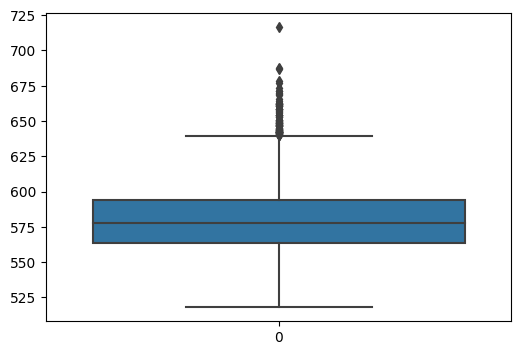

In [ ]:
sns.boxplot(df["Xmax"])

<Axes: >

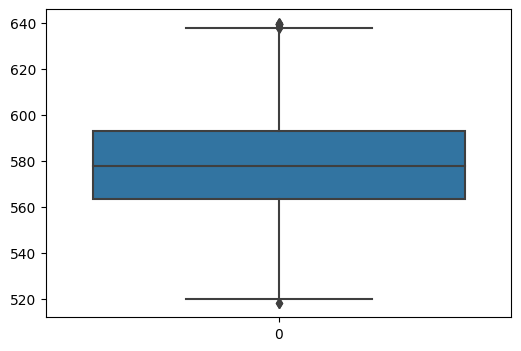

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' y quieres eliminar los outliers de la columna 'column_name'
# Calcula los percentiles 25 y 75 para la columna 'column_name'
Q1 = df['Xmax'].quantile(0.25)
Q3 = df['Xmax'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers
df_conc = df[(df['Xmax'] >= lower_bound) & (df['Xmax'] <= upper_bound)]
sns.boxplot(df_conc["Xmax"])

In [ ]:
df.head()

,lgE,zenith,Seed2,Seed3,Xfirst,Hfirst,XfirstIn,X0,Xmax,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,17.018965,62.145683,2,0,4.666200,42357.080,0.803571,-24.843546,570.23920,57784590.0,92.592186,-0.067881,0.000046,0.352232,566.54236,57520660.0,563.67830
1,17.024315,32.893510,12192693,0,4.596425,38126.535,0.892857,-33.289776,561.58777,58243696.0,91.286370,-0.056130,0.000040,0.228154,559.05220,58175090.0,556.06433
2,17.000030,42.873140,24837462,0,4.191171,39867.133,0.607143,-49.232376,594.11460,54536708.0,81.818665,-0.044783,0.000034,0.043274,593.68340,54552532.0,590.70110
3,17.028786,55.115772,34284918,0,5.855533,39122.420,0.285714,-19.989582,617.66125,59091640.0,84.353010,-0.051793,0.000037,0.575614,613.00460,58692292.0,609.88086
4,16.949389,49.235756,43039435,0,14.610561,31658.965,0.535714,-27.789558,569.54095,48750524.0,87.379280,-0.052736,0.000040,0.183219,567.37070,48774410.0,563.69790


In [ ]:
normalized = scaler.fit_transform(df)
normalized

array([[0.57598127, 0.95558205, 0.        , ..., 0.25557624, 0.50794682,
        0.25633713],
       [0.59738727, 0.49978961, 0.0121943 , ..., 0.21810753, 0.52426612,
        0.21773889],
       [0.50022006, 0.65528712, 0.02484073, ..., 0.39134632, 0.4339316 ,
        0.39332644],
       ...,
       [0.18598007, 0.16515939, 0.84548903, ..., 0.39278251, 0.22938012,
        0.39163681],
       [0.53060457, 0.68676617, 0.8564685 , ..., 0.38325946, 0.47180571,
        0.38618341],
       [0.95403113, 0.63970859, 0.87266428, ..., 0.41715866, 0.80406449,
        0.4179916 ]])

### PCA

In [ ]:
X=df_conc.drop(columns=["Xmax", "Seed2", "Seed3"])
X

,lgE,zenith,Xfirst,Hfirst,XfirstIn,X0,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,17.018965,62.145683,4.666200,42357.080,0.803571,-24.843546,57784590.0,92.592186,-0.067881,0.000046,0.352232,566.54236,57520660.0,563.67830
1,17.024315,32.893510,4.596425,38126.535,0.892857,-33.289776,58243696.0,91.286370,-0.056130,0.000040,0.228154,559.05220,58175090.0,556.06433
2,17.000030,42.873140,4.191171,39867.133,0.607143,-49.232376,54536708.0,81.818665,-0.044783,0.000034,0.043274,593.68340,54552532.0,590.70110
3,17.028786,55.115772,5.855533,39122.420,0.285714,-19.989582,59091640.0,84.353010,-0.051793,0.000037,0.575614,613.00460,58692292.0,609.88086
4,16.949389,49.235756,14.610561,31658.965,0.535714,-27.789558,48750524.0,87.379280,-0.052736,0.000040,0.183219,567.37070,48774410.0,563.69790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,17.072456,35.717407,8.673981,33778.920,0.857143,-36.519890,65917476.0,86.124080,-0.051479,0.000040,0.184960,554.10270,65917264.0,551.54190
5978,16.911907,33.577328,8.742218,33548.375,0.535714,-46.422180,44842240.0,81.370766,-0.037309,0.000029,0.048647,579.26074,44809616.0,576.11255
5979,16.921492,11.417372,15.857095,28440.537,0.053572,-34.428460,46356930.0,78.598810,-0.037379,0.000033,0.013786,593.97050,46349692.0,590.36780
5980,17.007624,44.893425,22.605934,28208.318,0.303572,-16.908226,56210956.0,84.869705,-0.046401,0.000036,0.078517,592.06680,56071344.0,589.29205


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X=df_conc.drop(columns=["Xmax", "Seed2", "Seed3"])
scaler.fit(X)
scaled_data=scaler.transform(X)
# Use fit and transform method
pca = PCA(n_components=3)  # project from 64 to 3 dimensions
projected = pca.fit_transform(scaled_data)
projected

array([[ 0.06912847, -0.55326151, -0.11752831],
       [ 0.13260979, -0.39440765, -0.08066579],
       [ 0.18872175,  0.11378026, -0.19852005],
       ...,
       [-0.01245522,  0.78965338,  0.10243796],
       [ 0.32411118,  0.27983103,  0.33736831],
       [ 0.9315522 ,  0.14248714, -0.60298444]])

realizamos una normalizacion de los datos.
Podemos comparar las graficas de dispersion de los datos originales con los datos normalizados. Aparentemente son similares.

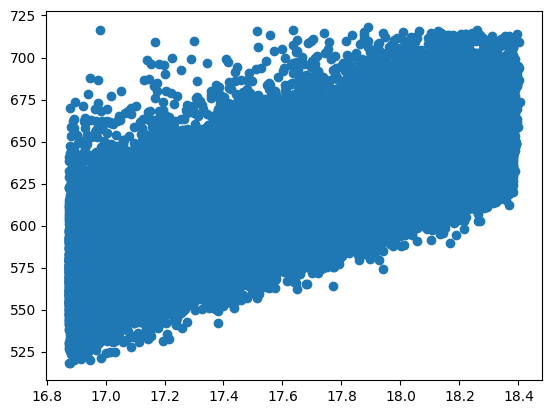

In [ ]:
plt.scatter(df["lgE"], df["Xmax"])
plt.show()

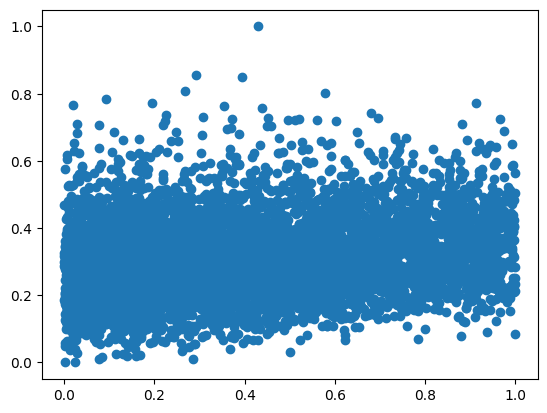

In [ ]:
plt.scatter(normalized[:,0], normalized[:,8])
plt.show()

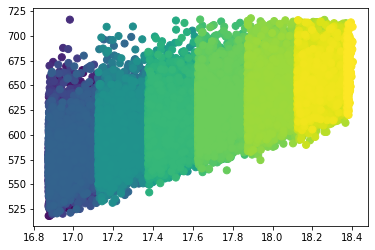

In [ ]:
#from scipy.stats import gaussian_kde
#x = df["lgE"]
#y = df["Xmax"]

# Calculate the point density
#xy = np.vstack([df["lgE"],df["Xmax"]])
#z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

#fig, ax = plt.subplots()
#ax.scatter(df["lgE"],df["Xmax"], c=z, s=50)
#plt.show()

<Axes: >

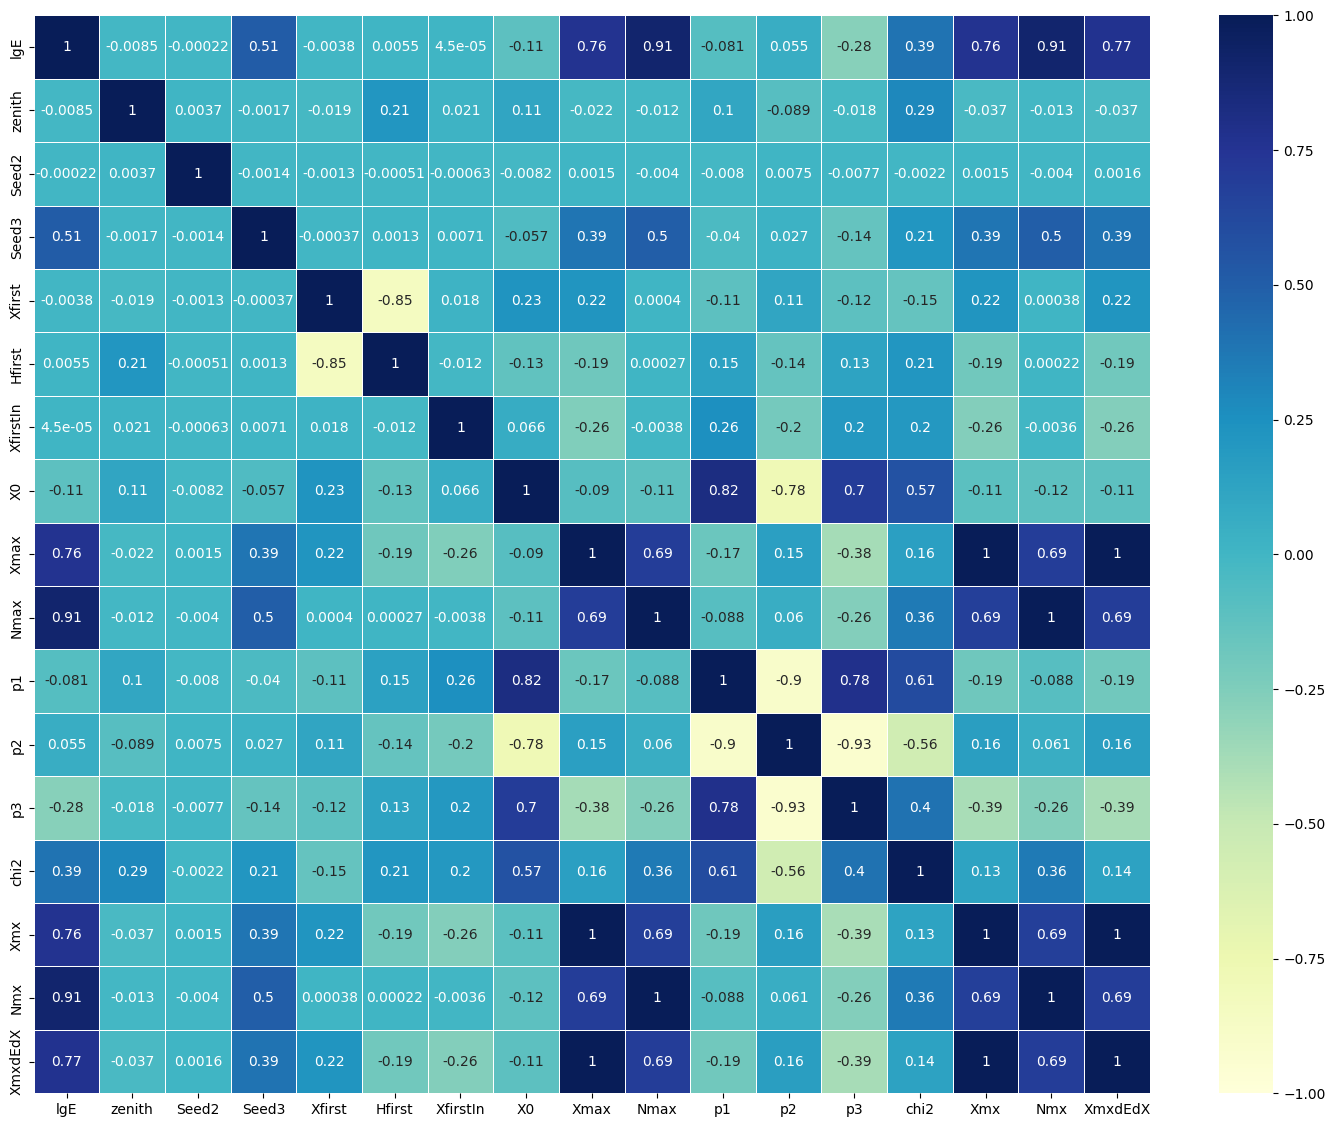

In [ ]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

Definimos las variables predictors y target


predictors = lgE, Xfirst, Hfirst, Xfirstin, Nmax, p1,p2,p3, chi2, Nmx

predictors_6 = lgE, Nmax, Xfirst, Hfirst, Xfirstin, p3

predictors_3 = lgE, Nmax, p3

Target = Xmax

In [ ]:
predictors = normalized[:,[0, 4, 5,6, 9,10,11,12,13,15]]
target = normalized[:,8]

In [ ]:
predictors_6 = normalized[:,[0, 4, 5,6, 9,12]]


In [ ]:
type(predictors)

numpy.ndarray

In [ ]:
pd.Series(target).isna().sum()

0

In [ ]:
target

array([0.26114964, 0.21785118, 0.38064063, ..., 0.65425616, 0.66958248,
       0.80722785])

In [ ]:
predictors

array([[0.09416745, 0.13029486, 0.52786836, ..., 0.70780411, 0.28230839,
        0.01510929],
       [0.09766712, 0.12823628, 0.41024966, ..., 0.5904704 , 0.18263747,
        0.01559472],
       [0.08178121, 0.11627998, 0.45864221, ..., 0.46960809, 0.0341246 ,
        0.01290764],
       ...,
       [0.98530594, 0.28943162, 0.29830903, ..., 0.3067643 , 0.49099864,
        0.99935548],
       [0.98181346, 0.37860941, 0.29714772, ..., 0.49090456, 0.66368507,
        0.98009937],
       [0.98213988, 0.02612339, 0.7611429 , ..., 0.22383303, 0.33183635,
        0.97511792]])

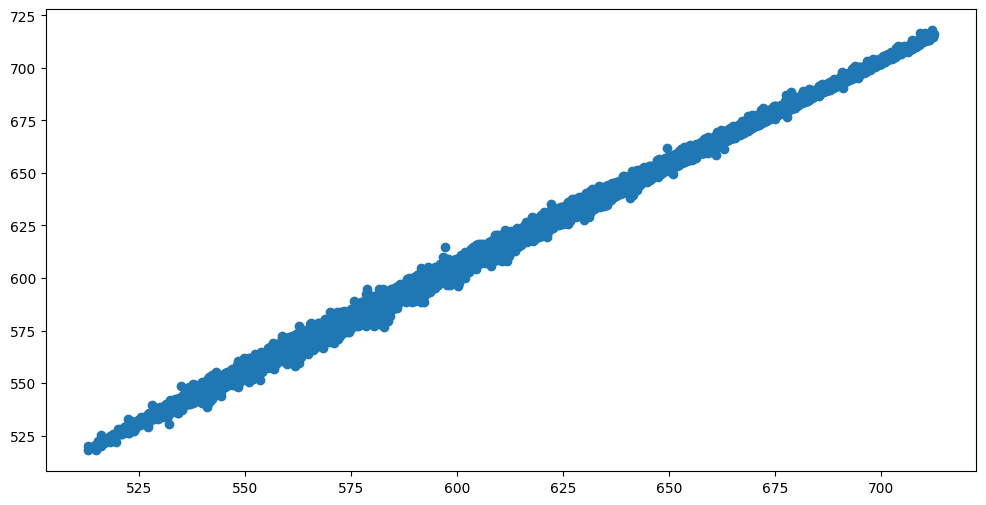

In [ ]:
plt.scatter(df["XmxdEdX"], df["Xmax"])

Dado que la grafica de dispersion de Xmax con xmxdEdX y Xmx tiene una variable de correlacion igual a 1, no los vamos a considerar como nuestras variables predictoras. Esto porque son las mismas columnas, contienen los mismos valores que Xmax.

# Redes neuronales cuanticas

In [ ]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.6 MB/s eta 0:00:00


In [ ]:
pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512704 sha256=7898085c05d39e746a6c56b509ec2ae321e4f23a6dcccee75a64e1dab5de0c7e
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=0b823de73b3544d2bd5c7a4ef6e599ae0e2358e290078f9b194b7899c9b879ff
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
import qiskit_algorithms
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
import qiskit_algorithms
#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

<ipython-input-13-dc3044fa32a5>:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B


In [ ]:
from sklearn.model_selection import train_test_split
#debemos pasar los objetos a arrays de numpy
target = np.array(target)
predictors = np.array(predictors)
predictors.shape

(5982, 10)

In [ ]:
target

array([0.26114964, 0.21785118, 0.38064063, ..., 0.65425616, 0.66958248,
       0.80722785])

Dividimos los datos en datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors_3, target, test_size=0.2, random_state=42)

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

from qiskit.algorithms.optimizers import SPSA
from qiskit import QuantumCircuit
#from qiskit.circuit.quantumcircuit import ry
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import RYGate

from qiskit_machine_learning.algorithms import VQC
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

## Regresion con EstimatorQNN

cambiamos la forma de las variables predictors y target para que sean arrays de n entradas y 1 dimension

Plan a)
Entrenar un modelo de quantum neural network regressor con 10 columnas como datos predictores, esto corresponde a 10 qubits en el circuito.

----- Falló -------


El entrenamiento falló porque se usó toda la RAM disponible. Es necesario actualizar a Colab pro.


Plan b)
Reducir el numero de columnas a 6 e intentar entrenar el modelo con 6 qubits.

-------------- falló --------
el tiempo de entrenamiento era demasiado.


Plan c)

Reducir el numero de columnas a 3 para tener un modelo con 3 qubits.


Plan d)

Reducir el numero de columnas a 1 para tener un modelo con 1 qubit.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)


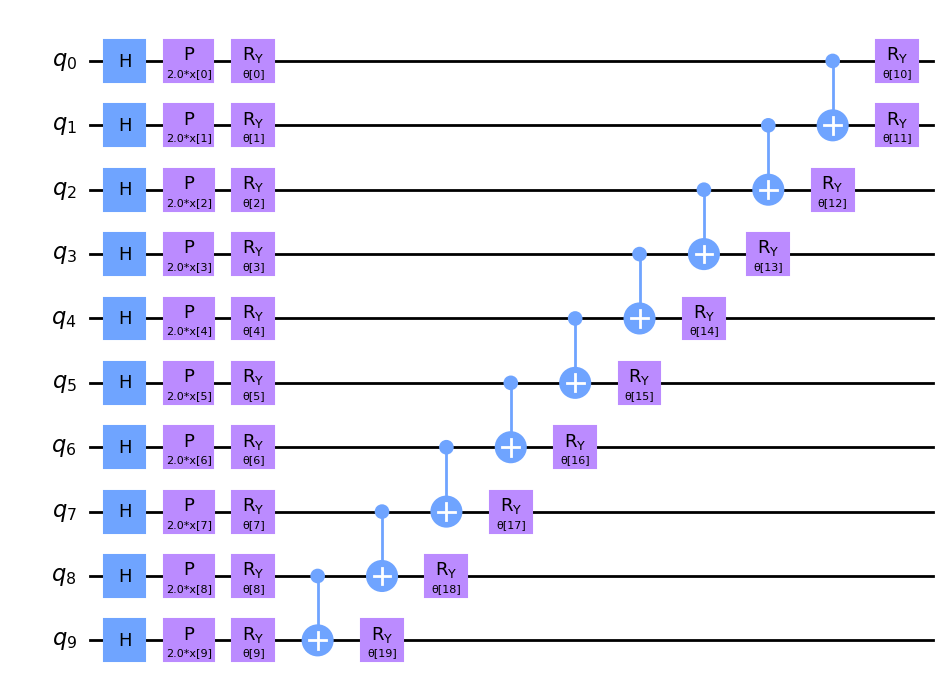

In [ ]:
# MODELO DE QUANTUM CIRCUIT GENERAL
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap

#feature map
num_features = len(X_train[0])
feature_map = ZFeatureMap(feature_dimension=num_features, reps=1)

#Ansatz o circuito variacional
ansatz = RealAmplitudes(num_qubits=num_features, reps=1)

#unirlo todo en un solo circuito

qc = QuantumCircuit(len(X_train[0]))

qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.draw()
qc.decompose().draw(output = "mpl", fold=20)

In [ ]:
# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
type(X_train[0])

numpy.ndarray

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=1),
    callback=callback_graph,
)

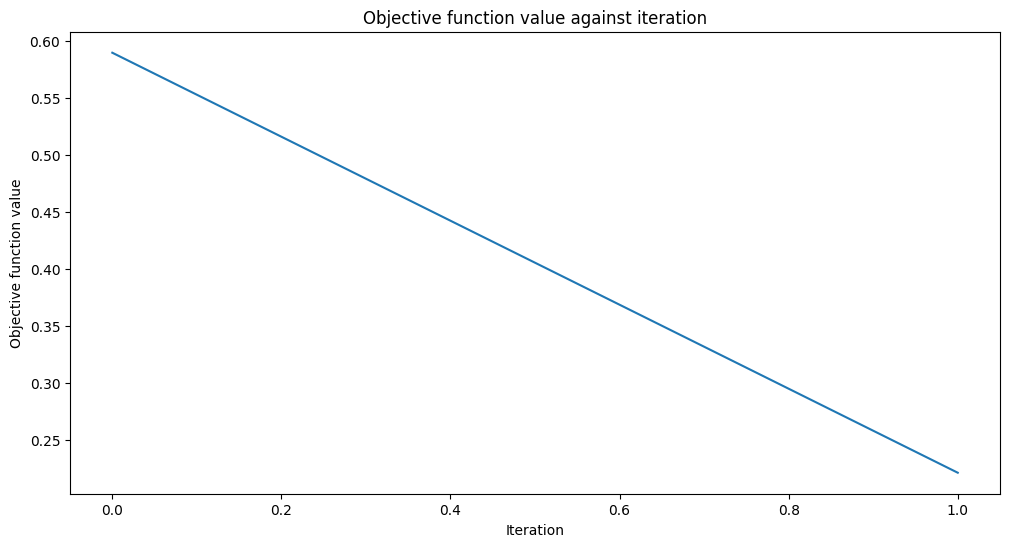

-6.763739270119267

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

-6.779169173817254

In [ ]:
regressor.save("regressor_model_QNN_3qbits_He")

In [ ]:
# plot target function
plt.plot(X_test,y_test, "r--")

# plot data
#plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_test)
plt.plot(X_test, y_, "g-")
plt.show()

## Regresion con Variational Quantum Regressor VQR

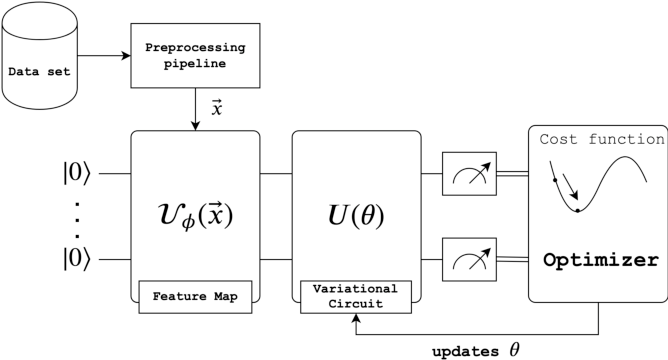

In [ ]:
pip install qiskit


In [ ]:
pip install qiskit_machine_learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from sklearn.model_selection import train_test_split

#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
pip install pylatexenc

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,Aer, execute
import numpy as np

### definiendo el circuito propio

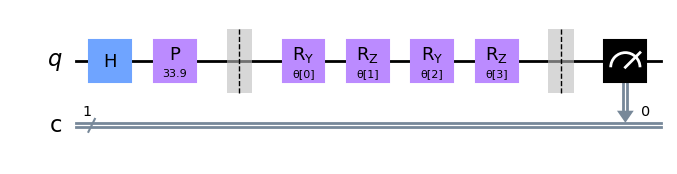

In [ ]:
def my_circuit1(X, reps_feature_map,theta,rep_ansatz):
  feature_map = ZFeatureMap(feature_dimension=len(X), reps=reps_feature_map)

  qc = QuantumCircuit(len(X),1)
  qc.append(feature_map.decompose(), range(len(X)))
  qc.barrier()

  qc = qc.bind_parameters(X)
  W = RealAmplitudes(num_qubits=len(X), reps=rep_ansatz)
  W = EfficientSU2(num_qubits=len(X), reps=rep_ansatz)
  #W = W.bind_parameters(theta)
  qc.append(W.decompose(), range(1))

  qc.barrier()
  qc.measure(0, 0)
  return qc

reps_feature_map = 1
rep_ansatz = 1
theta_dim = 4+4*rep_ansatz
#theta = np.zeros(theta_dim)
theta = range(theta_dim)
qc = my_circuit1(X_train[0], 1,theta,rep_ansatz)

qc.decompose().draw(output = "mpl", fold=20)

### usando funciones ya definidas

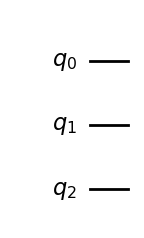

In [ ]:
from qiskit import QuantumCircuit
import numpy as np

n=len(X_train[0])

qc = QuantumCircuit(3)
#qc.p(np.pi/2,0)
qc.decompose().draw(output = "mpl", fold=20)

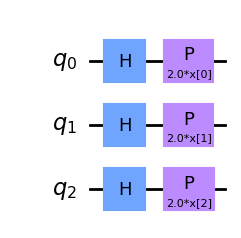

In [ ]:
#feature map
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap

num_features = 3

feature_map = ZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

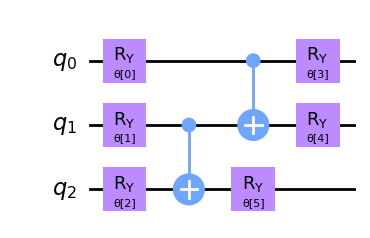

In [ ]:
#Ansatz o circuito variacional
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

ansatz = RealAmplitudes(num_qubits=num_features, reps=1)
ansatz.decompose().draw(output="mpl", fold=20)

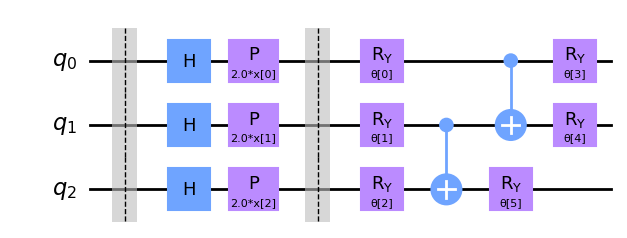

In [ ]:
qc.barrier()
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.decompose().draw(output='mpl')

In [ ]:
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP

from IPython.display import clear_output
import time


optimizer = COBYLA(maxiter=2)

from qiskit.primitives import Sampler
sampler = Sampler()


objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()




In [ ]:

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)


In [ ]:
#X_train = pd.DataFrame(np.c_[X_train])
#y_train=np.array(y_train)
#X_train

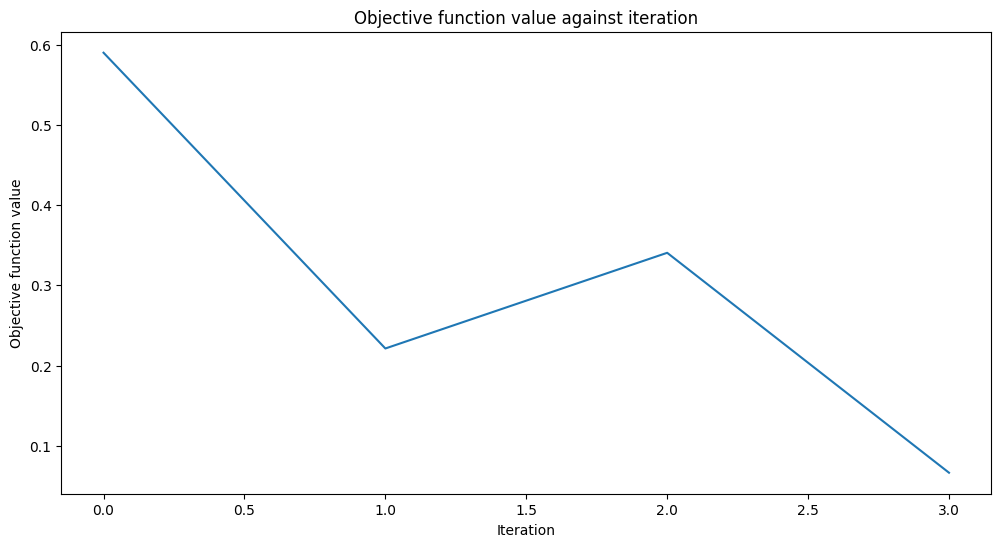

Training time: 3584 seconds


In [ ]:
# clear objective value history
objective_func_vals = []

start = time.time()
vqr.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
vqr.score(X_test, y_test)

-1.302217374019417

In [ ]:
vqr.save("vqr_3qbits_He")

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train.shape, X_train.shape

((54572, 1), (54572, 1))

In [ ]:
train_score_vqr = vqr.score(X_train, y_train)
test_score_vqr = vqr.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_vqr:.2f}")

Quantum VQC on the training dataset: -1.33
Quantum VQC on the test dataset:     -1.30


# Modelos que si funcionan

## Regresion con EstimatorQNN


In [ ]:
df_x1 = df["lgE"]
dfc_x1 = df_conc["lgE"]
dfc_y = df_conc["Xmax"]
df_y = df["Xmax"]

In [ ]:
df_x1_train, df_x1_test, df_y_train, df_y_test = train_test_split(df_x1, df_y, test_size = 0.2, random_state= 42)

In [ ]:
dfc_x1_train, dfc_x1_test, dfc_y_train, dfc_y_test = train_test_split(dfc_x1, dfc_y, test_size = 0.2, random_state= 42)

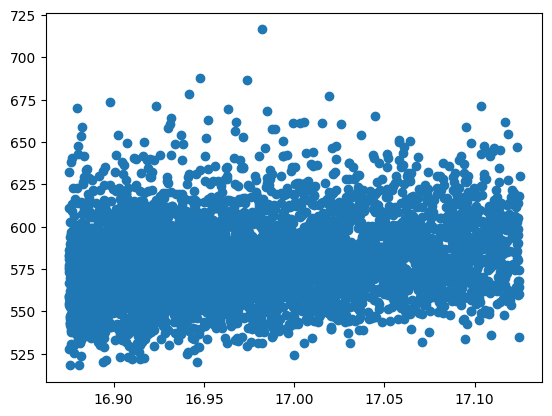

In [ ]:
plt.scatter(df_x1_train,df_y_train)

### Considerando 1 variable y df completo

In [ ]:
#def procc_df(df):


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#las variables predictoras deben estar en formato array y al tener solo una variable,
#es necesario cambiar las dimensiones a (n,1)
#la variable target debe estar normalizada para poder usar el modelo EstimatorQNN
df_x1_train = np.array(df_x1_train)
df_x1_train = df_x1_train.reshape(len(df_x1_train), 1)
df_y_train = np.array(df_y_train)

scaler = MinMaxScaler()
df_y_train = scaler.fit_transform(df_y_train.reshape(-1,1))

df_x1_test = np.array(df_x1_test)
df_x1_test = df_x1_test.reshape(len(df_x1_test), 1)
df_y_test = np.array(df_y_test)

scaler = MinMaxScaler()
df_y_test = scaler.fit_transform(df_y_test.reshape(-1,1))

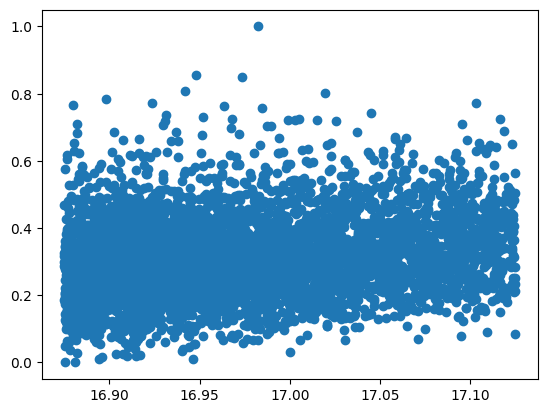

In [ ]:
plt.scatter(df_x1_train,df_y_train)

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

# construct simple feature map
param_x1 = Parameter("x")
#param_x2 = Parameter("x2")
#param_x3 = Parameter("x3")

#feature_map = ZFeatureMap(1, reps=1)

feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x1, 0)
#feature_map.ry(param_x2, 1)
#feature_map.ry(param_x3, 2)

# construct simple ansatz

#ansatz = EfficientSU2(1, reps=1)

param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)


# construct a circuit
qc = QuantumCircuit(1)
qc.barrier()
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

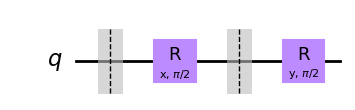

In [ ]:
qc.draw(output="mpl")
qc.decompose().draw(output="mpl", fold=20)

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(df_x1_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(df_x1_train, df_y_train)

ValueError: ignored

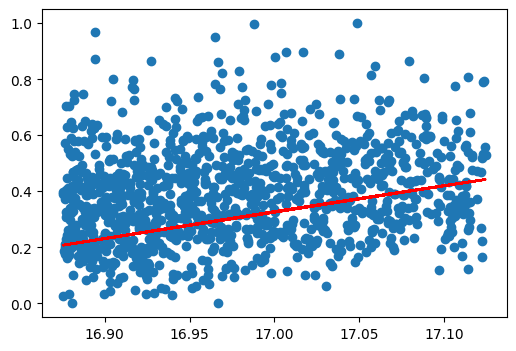

In [ ]:
# plot data
plt.scatter(df_x1_test, df_y_test)
#regressor entrenado con 1 qubit y 10 iters
# plot fitted line
y_ = regressor.predict(df_x1_test)
plt.plot(df_x1_test, y_, "r-")
plt.show()

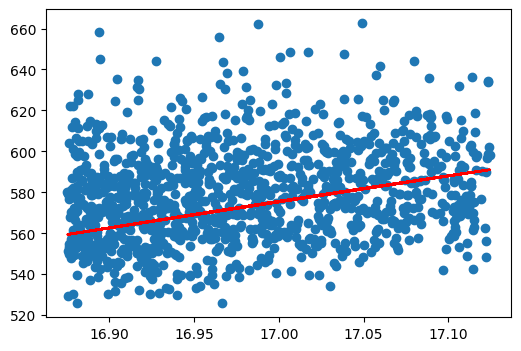

In [ ]:

original_values = scaler.inverse_transform(df_y_test)

plt.scatter(df_x1_test, original_values)

# plot fitted line
y_ = regressor.predict(df_x1_test)
plt.plot(df_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

In [ ]:
regressor.score(df_x1_test, df_y_test)

-0.07696322960242807

In [ ]:
regressor.score(df_x1_train, df_y_train)

-0.1314041149220615

### Considerando 1 variable y df limpio

Para que el modelo funcione los datos predictores deben estar en formato array, con dimensiones (n, 1) y

In [ ]:
dfc_x1_train, dfc_x1_test, dfc_y_train, dfc_y_test = train_test_split(dfc_x1, dfc_y, test_size = 0.2, random_state= 42)

In [ ]:
dfc_y_train.shape

(4709,)

In [ ]:
dfc_x1_train = np.array(dfc_x1_train)
dfc_x1_train = dfc_x1_train.reshape(len(dfc_x1_train), 1)
dfc_y_train = np.array(dfc_y_train)
scaler = MinMaxScaler()
#df_y_train = scaler.fit_transform(df_y_train)
#df_y_train
dfc_y_train = scaler.fit_transform(dfc_y_train.reshape(-1,1))

In [ ]:
dfc_x1_test = np.array(dfc_x1_test)
dfc_x1_test = dfc_x1_test.reshape(len(dfc_x1_test), 1)
dfc_y_test = np.array(dfc_y_test)
#df_y_train = scaler.fit_transform(df_y_train)
#df_y_train
dfc_y_test = scaler.fit_transform(dfc_y_test.reshape(-1,1))

In [ ]:
regressor2 = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

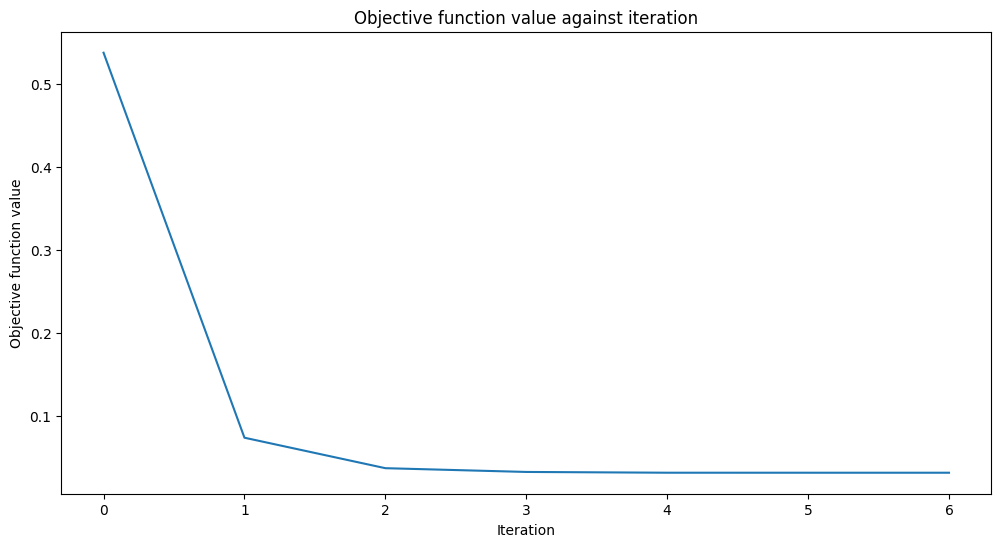

0.02745192580200817

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor2.fit(dfc_x1_train, dfc_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor2.score(dfc_x1_train, dfc_y_train)

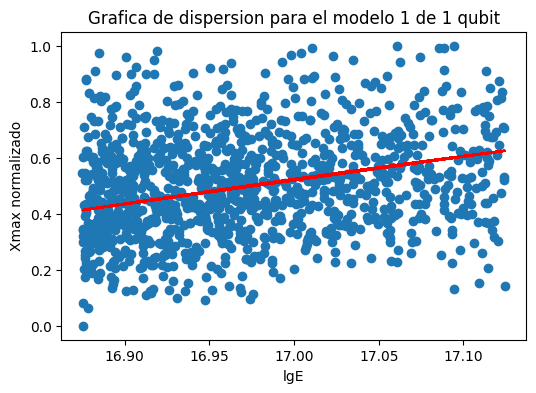

In [ ]:
# plot data
plt.scatter(dfc_x1_test, dfc_y_test)

# plot fitted line
y_ = regressor2.predict(dfc_x1_test)
plt.plot(dfc_x1_test, y_, "r-")
plt.title("Grafica de dispersion para el modelo 1 de 1 qubit" )
plt.xlabel("lgE")
plt.ylabel("Xmax normalizado")
plt.show()

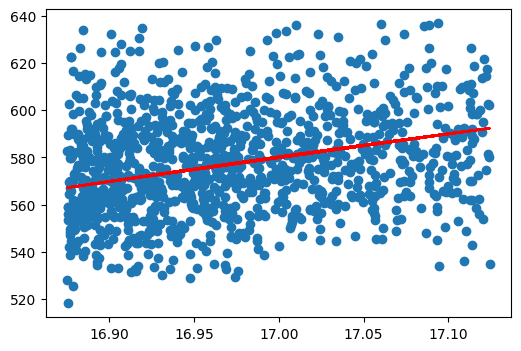

In [ ]:

original_values = scaler.inverse_transform(dfc_y_test)

plt.scatter(dfc_x1_test, original_values)

# plot fitted line
y_ = regressor2.predict(dfc_x1_test)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

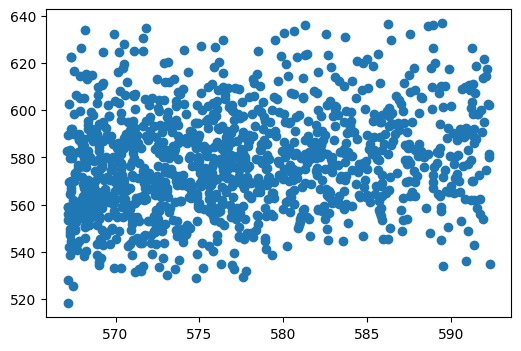

In [ ]:

plt.scatter(scaler.inverse_transform(y_), original_values)

#### intento con 1 qubit, df limpio y funciones definidas de Feature map y Ansatz

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

feature_map2 = ZFeatureMap(1,reps=1)
ansatz2 = EfficientSU2(1,reps=2)
# construct a circuit
qc = QuantumCircuit(1)
qc.barrier()
qc.compose(feature_map2, inplace=True)
qc.barrier()
qc.compose(ansatz2, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map2.parameters, weight_params=ansatz2.parameters
)

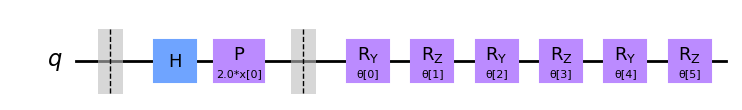

In [ ]:
qc.draw(output="mpl")
qc.decompose().draw(output="mpl", fold=20)

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

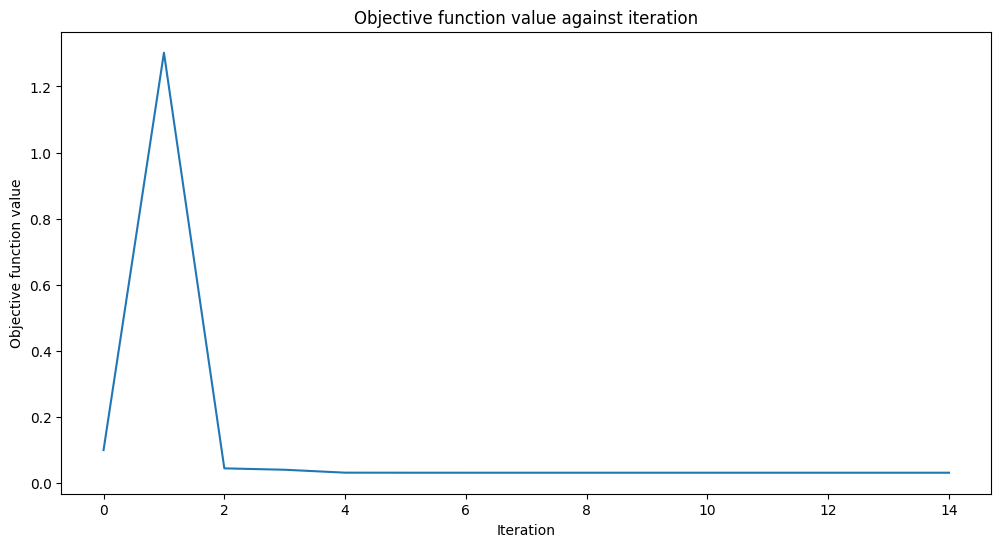

0.04227886726405494

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(dfc_x1_train, dfc_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(dfc_x1_train, dfc_y_train)

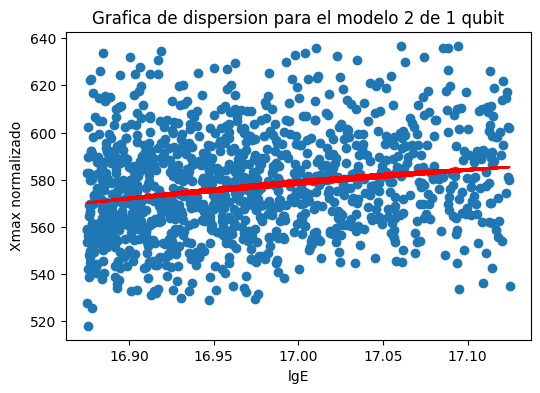

In [ ]:
original_values = scaler.inverse_transform(dfc_y_test)

plt.scatter(dfc_x1_test, original_values)

# plot fitted line
y_ = regressor.predict(dfc_x1_test)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.title("Grafica de dispersion para el modelo 2 de 1 qubit" )
plt.xlabel("lgE")
plt.ylabel("Xmax normalizado")
plt.show()

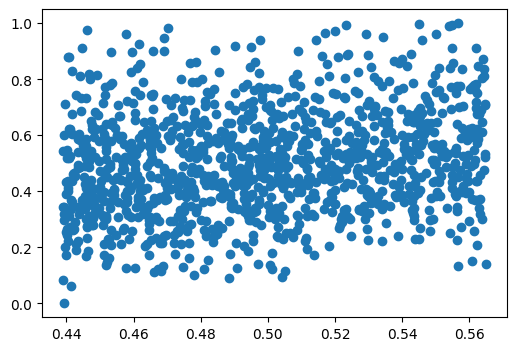

In [ ]:
plt.scatter(scaler.inverse_transform(y_), scaler.inverse_transform(dfc_y_test))

### intentando con variables normalizadas y 1 qubit

In [ ]:
df_conc.columns

Index(['lgE', 'zenith', 'Seed2', 'Seed3', 'Xfirst', 'Hfirst', 'XfirstIn', 'X0',
       'Xmax', 'Nmax', 'p1', 'p2', 'p3', 'chi2', 'Xmx', 'Nmx', 'XmxdEdX'],
      dtype='object')

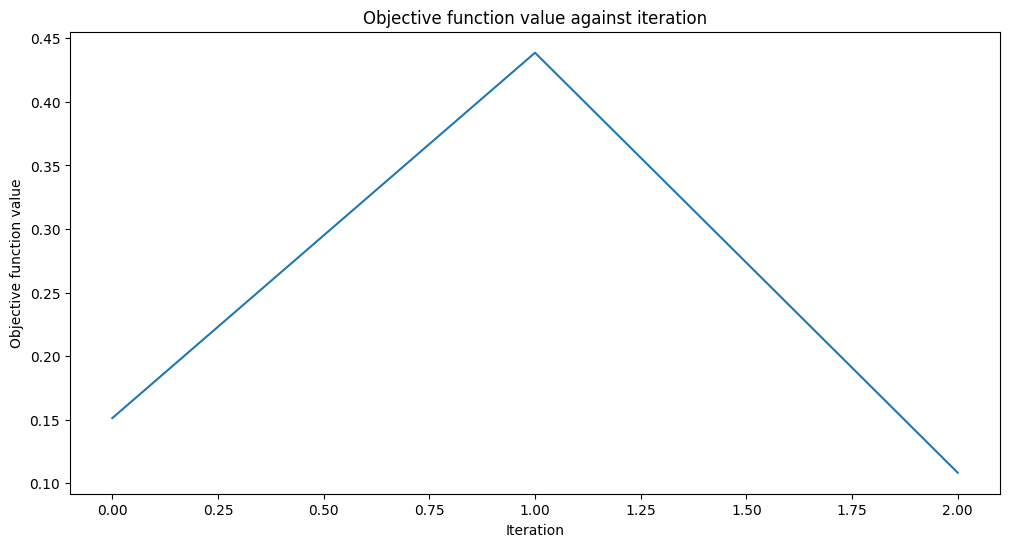

-2.350042438370519

In [ ]:
norm_1 = scaler.fit_transform(df_conc)
predictors_1 =  norm_1[:,0]
target_1 = norm_1[:,8]
predictors_1 = predictors_1.reshape(len(predictors_1),1)
x1_train, x1_test, y_train, y_test = train_test_split(predictors_1, target_1, test_size = 0.2, random_state=42)


# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(x1_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(x1_train, y_train)

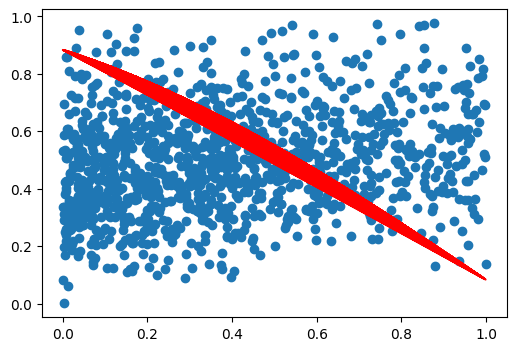

In [ ]:
# plot data
plt.scatter(scaler.inverse_transform(x1_test), scaler.inverse_transform(y_test))
#regressor entrenado con 1 qubit y 10 iters
# plot fitted line
y_ = regressor.predict(x1_test)
plt.plot(scaler.inverse_transform(x1_test),scaler.inverse_transform(y_), "r-")
plt.show()

### Considerando 3 variables

#### Con solo 3 rotaciones  

In [ ]:
df_x3 = df_conc[["lgE", 'Nmax', "p3"]]
df_y = df_conc["Xmax"]
df_x3

,lgE,Nmax,p3
0,17.018965,57784590.0,0.000046
1,17.024315,58243696.0,0.000040
2,17.000030,54536708.0,0.000034
3,17.028786,59091640.0,0.000037
4,16.949389,48750524.0,0.000040
...,...,...,...
5977,17.072456,65917476.0,0.000040
5978,16.911907,44842240.0,0.000029
5979,16.921492,46356930.0,0.000033
5980,17.007624,56210956.0,0.000036


In [ ]:
df_x3_train, df_x3_test, df_y_train, df_y_test = train_test_split(df_x3, df_y, test_size = 0.2, random_state= 42)

In [ ]:
np.array(df_x3)

array([[1.7018965e+01, 5.7784590e+07, 4.5602430e-05],
       [1.7024315e+01, 5.8243696e+07, 4.0045852e-05],
       [1.7000030e+01, 5.4536708e+07, 3.4322170e-05],
       ...,
       [1.6921492e+01, 4.6356930e+07, 3.2636355e-05],
       [1.7007624e+01, 5.6210956e+07, 3.5562770e-05],
       [1.7113451e+01, 6.9399140e+07, 2.8532630e-05]])

In [ ]:
df_x3_train = np.array(df_x3_train)
#df_x3_train = df_x3_train.reshape(len(df_x3_train), 1)
df_y_train = np.array(df_y_train)

scaler = MinMaxScaler()
df_y_train = scaler.fit_transform(df_y_train.reshape(-1,1))

df_x3_test = np.array(df_x3_test)
#df_x3_test = df_x3_test.reshape(len(df_x3_test)*3, 1)
df_y_test = np.array(df_y_test)

#scaler = MinMaxScaler()
df_y_test = scaler.fit_transform(df_y_test.reshape(-1,1))

array([[0.46606229],
       [0.61449411],
       [0.36639146],
       ...,
       [0.53325845],
       [0.74810088],
       [0.36077307]])

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN


# construct simple feature map
param_x1 = Parameter("x")
param_x2 = Parameter("x2")
param_x3 = Parameter("x3")

feature_map3 = QuantumCircuit(3, name="fm")
feature_map3.ry(param_x1, 0)
feature_map3.ry(param_x2, 1)
feature_map3.ry(param_x3, 2)

# construct simple ansatz
param_y1 = Parameter("y1")
param_y2 = Parameter("y2")
param_y3 = Parameter("y3")


ansatz3 = QuantumCircuit(3, name="vf")
ansatz3.ry(param_y1, 0)
ansatz3.ry(param_y2, 1)
ansatz3.ry(param_y3, 2)


# construct a circuit
qc3p = QuantumCircuit(3)
qc3p.barrier()
qc3p.compose(feature_map3, inplace=True)
qc3p.barrier()
qc3p.compose(ansatz3, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc3p, input_params=feature_map3.parameters, weight_params=ansatz3.parameters
)

In [ ]:
qc3.draw(output = "mpl")
qc3.decompose().draw(output = "mpl", fold=20)

In [ ]:
regressor_3q_params = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor_3q_params.fit(df_x3_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor_3q_params.score(df_x3_train, df_y_train)

In [ ]:
regressor1_3qubits.score(df_x3_test, df_y_test)


#### usando funciones definidas para FeatureMap y Ansatz con 3 columnas del df

In [ ]:
# construct simple feature map
feature_map_d = ZFeatureMap(feature_dimension=3,reps=1)

ansatz_d = EfficientSU2(num_qubits=3, reps=1)
# construct a circuit

qc3 = QuantumCircuit(3)
qc3.barrier()
qc3.compose(feature_map_d, inplace=True)
qc3.barrier()
qc3.compose(ansatz_d, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc3, input_params=feature_map_d.parameters, weight_params=ansatz_d.parameters
)

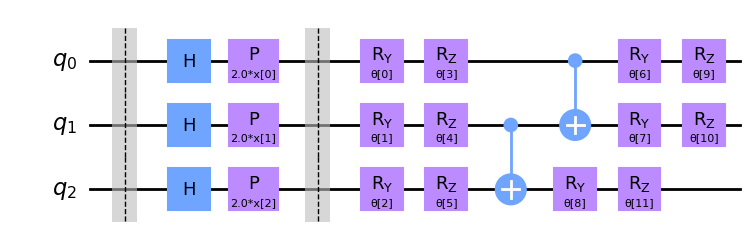

In [ ]:
qc3.draw(output = "mpl")
qc3.decompose().draw(output = "mpl", fold=20)

In [ ]:
regressor1_3qubits = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

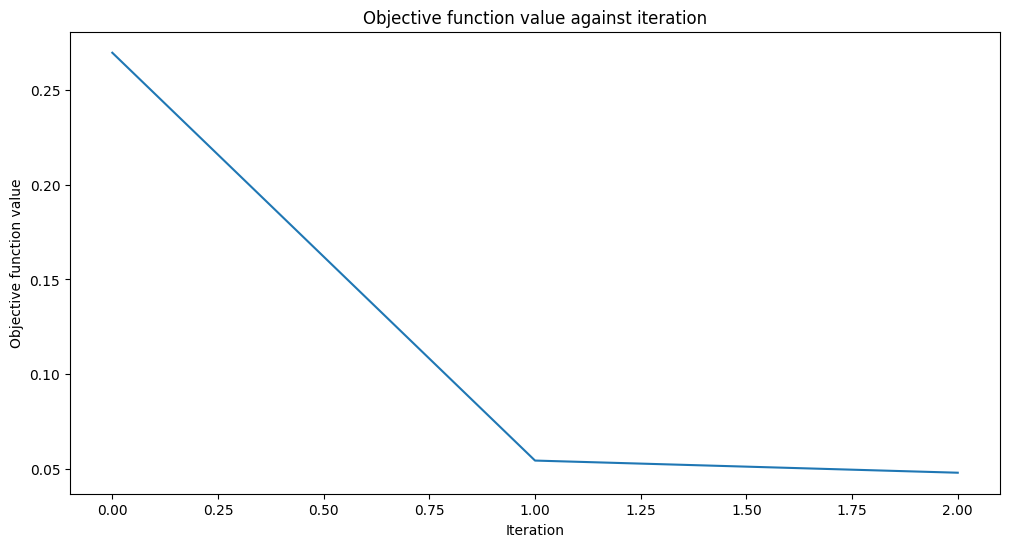

-0.4886075482700074

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor1_3qubits.fit(df_x3_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor1_3qubits.score(df_x3_train, df_y_train)

In [ ]:
regressor1_3qubits.score(df_x3_test, df_y_test)


-0.5080629385924047

In [ ]:
regressor1_3qubits.score(df_x3_train, df_y_train)


-6.541760231467185

##### Intento con los datos normalizados

In [ ]:
predictors_3 = normalized[:, [0,9,12]]

In [ ]:
x3_train, x3_test, y_train, y_test = train_test_split(predictors_3, target, test_size=0.2, random_state=42)

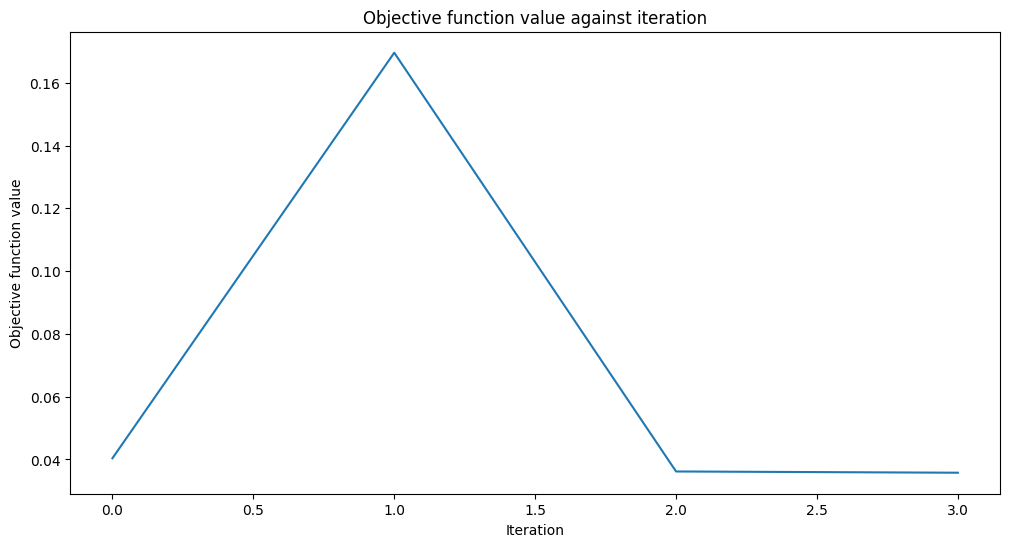

-1.495773563453711

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor1_3qubits.fit(x3_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor1_3qubits.score(x3_train, y_train)

In [ ]:
df_x3_train.shape

(4785, 3)

In [ ]:
regressor1_3qubits.score(x3_test, y_test)


-1.5408606259726416

##### Intento con PCA

In [ ]:
target_1 = norm_1[:,8]
target_1.shape

(5887,)

In [ ]:
pca3_train, pca3_test, y_train, y_test = train_test_split(projected, target_1, test_size=0.2, random_state=42)

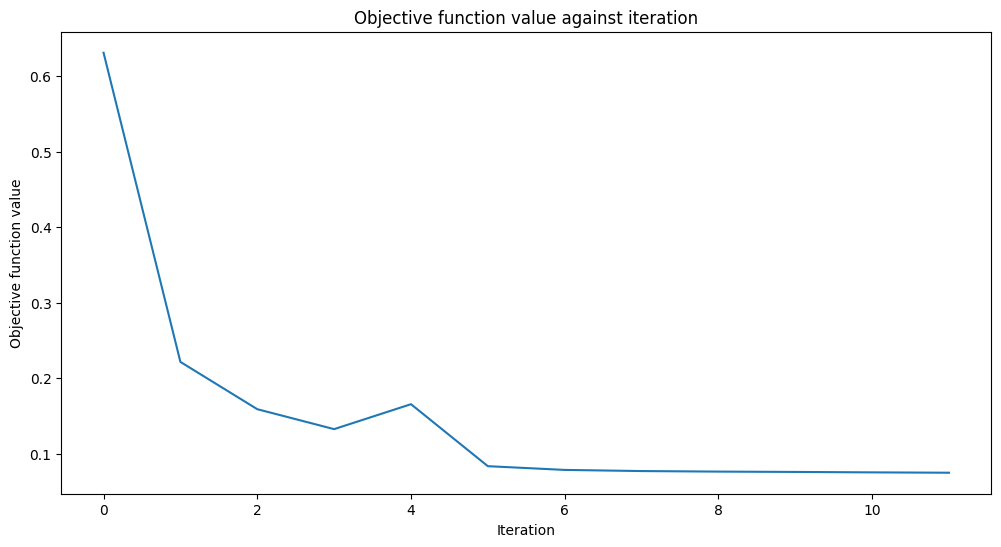

-1.2023371389915654

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor1_3qubits.fit(pca3_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor1_3qubits.score(pca3_train, y_train)
regressor1_3qubits.score(pca3_test, y_test)


In [ ]:
regressor1_3qubits.score(pca3_test, y_test)


-1.2023371389915654

intento de arbitrary encoding para realizar un circuito de 1 qubit que contenga 3 caracteristicas

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit import Parameter
import numpy as np

# Crea un circuito cuántico de un solo qubit
num_qubits = 1
qc = QuantumCircuit(num_qubits)

# Define los parámetros del ansatz EfficientSU2
# Puedes ajustar el número de capas según tus necesidades
num_layers = 2
num_features = 3
params = [Parameter(f'θ_{i}') for i in range(num_features * num_layers * 2)]

# Aplica EfficientSU2 como ansatz
ansatz = EfficientSU2(num_qubits, reps=num_layers, parameter_prefix='θ')
qc.append(ansatz.to_instruction(), range(num_qubits))

# Supongamos que tienes tres características (variables independientes)
# Cada característica se representa con un valor entre 0 y 1
col1_value = 0.7
col2_value = 0.4
col3_value = 0.2

# Escala los valores de las características para usarlos como ángulos
angle1 = col1_value * np.pi
angle2 = col2_value * np.pi
angle3 = col3_value * np.pi

# Aplica compuertas RX con los ángulos calculados
qc.rx(angle1, 0)  # Aplica la compuerta al qubit 0
qc.rx(angle2, 0)  # Aplica la compuerta al qubit 0
qc.rx(angle3, 0)  # Aplica la compuerta al qubit 0

# Transpila el circuito para adaptarlo al backend
qc_transpiled = transpile(qc, optimization_level=3)

# Muestra el circuito
print(qc_transpiled)


global phase: π
   ┌─────────────────────────────────────────────┐┌────────────────────┐
q: ┤ EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5]) ├┤ U3(7π/10,π/2,-π/2) ├
   └─────────────────────────────────────────────┘└────────────────────┘


## VQR

### Considerando 1 variable y df completo

In [ ]:
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP

from IPython.display import clear_output
import time


optimizer = COBYLA(maxiter=2)

from qiskit.primitives import Sampler
sampler = Sampler()


objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


In [ ]:
vqr = VQR(
    feature_map=feature_map_d,
    ansatz=ansatz_d,
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

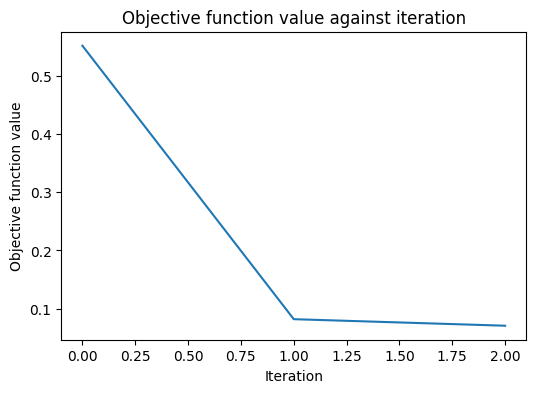

Training time: 824 seconds


In [ ]:
# clear objective value history
objective_func_vals = []
start = time.time()
vqr.fit(pca3_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_vqr = vqr.score(pca3_train, y_train)
test_score_vqr = vqr.score(pca3_test, y_test)

print(f"Quantum VQR on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQR on the test dataset:     {test_score_vqr:.2f}")

Quantum VQR on the training dataset: -1.19
Quantum VQR on the test dataset:     -1.09


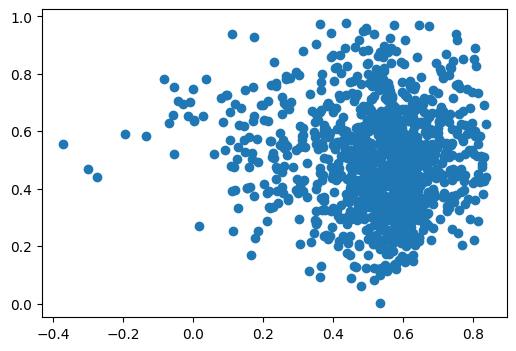

In [ ]:
plt.scatter(vqr.predict(pca3_test), y_test)

### Considerando 1 variable y df limpio

In [ ]:
vqr = VQR(
    feature_map=feature_map2,
    ansatz=ansatz2,
    optimizer=COBYLA(maxiter=2),
    callback=callback_graph,
)

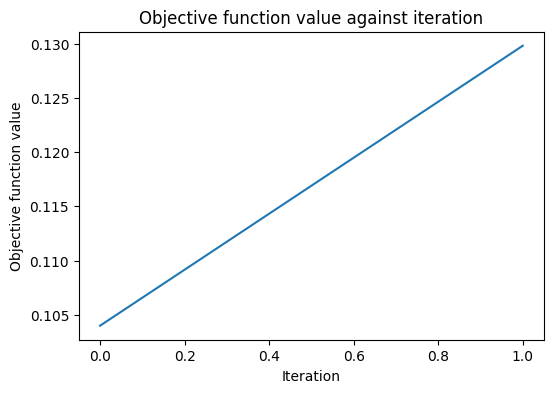

Training time: 17 seconds


In [ ]:
# clear objective value history
objective_func_vals = []
start = time.time()
vqr.fit(dfc_x1_train, dfc_y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_vqr = vqr.score(dfc_x1_train, dfc_y_train)
test_score_vqr = vqr.score(dfc_x1_test, dfc_y_test)

print(f"Quantum VQR on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQR on the test dataset:     {test_score_vqr:.2f}")

Quantum VQR on the training dataset: -2.22
Quantum VQR on the test dataset:     -2.21


## QSVR

In [ ]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
#from qiskit.aqua import QuantumInstance
#from qiskit.algorithms import VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un DataFrame 'df' con las columnas 'col1', 'col2', 'col3' y 'Xmax'

# Selecciona las características y la variable dependiente
X = df_conc[['lgE', 'Nmax', 'p3']]
y = df_conc['Xmax']

# Escala las características (opcional pero generalmente recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define un FeatureMap cuántico (puedes personalizarlo según tus necesidades)
feature_map = ZZFeatureMap(feature_dimension=3, reps=2)

# Configura un quantum instance
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Configura un optimizador cuántico
optimizer = SLSQP(maxiter=2)

# Crea un modelo VQR (Quantum Variational Regressor)
vqr = VQR(feature_map=feature_map, optimizer=optimizer, quantum_instance=quantum_instance)

# Entrena el modelo VQR
vqr.fit(X_train, y_train)

# Realiza predicciones con el modelo VQR
y_pred_quantum = vqr.predict(X_test)

# Entrena un modelo de regresión lineal clásico como comparación
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realiza predicciones con el modelo de regresión lineal
y_pred_classical = regressor.predict(X_test)

# Calcula métricas de rendimiento para ambos modelos
mse_quantum = mean_squared_error(y_test, y_pred_quantum)
mse_classical = mean_squared_error(y_test, y_pred_classical)

print(f"MSE Quantum Model: {mse_quantum}")
print(f"MSE Classical Linear Regression Model: {mse_classical}")


<ipython-input-40-e0a5e0e9134b>:31: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)


## Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
np.array(predictors).reshape((-1,1))

array([[0.01134061],
       [0.14036162],
       [0.12368042],
       ...,
       [0.92800661],
       [0.88828647],
       [0.95941472]])

In [ ]:
X = df_conc['lgE'].values.reshape(-1, 1)  # Asegúrate de que X sea una matriz 2D.
y = df_conc['Xmax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Crea un modelo de regresión lineal.
modelo = LinearRegression()

# Ajusta el modelo a tus datos.
modelo.fit(X_train, y_train)

# Realiza predicciones utilizando el modelo entrenado.
y_pred = modelo.predict(X_test)

# Imprime los coeficientes de la regresión lineal.
print("Coeficiente de pendiente (m):", modelo.coef_[0])
print("Término independiente (b):", modelo.intercept_)


Coeficiente de pendiente (m): 65.12584077231321
Término independiente (b): -526.6273826194908


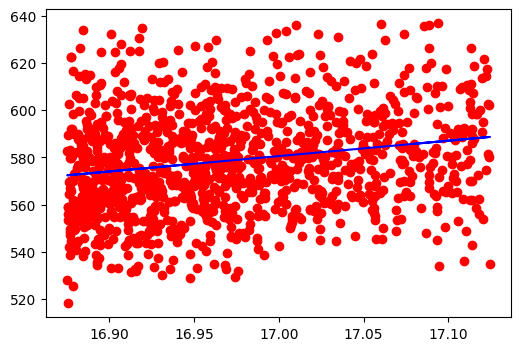

0.0376644550889611

In [ ]:
plt.plot(X_test,y_pred, color = "b")
plt.scatter(X_test,y_test, color ="r")
plt.show()
modelo.score(X_test,y_test)

## Regresion multiple

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tienes un DataFrame 'df' con tres columnas independientes 'col1', 'col2', 'col3' y una columna dependiente 'target'.

# Selecciona las características y la variable dependiente
X = df_conc[['lgE', 'Nmax', 'p3']]
y = df_conc['Xmax']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
regressor = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcula métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Coeficientes y término independiente del modelo
print("Coeficientes del modelo:")
print(regressor.coef_)
print("Término independiente:")
print(regressor.intercept_)


Error cuadrático medio (MSE): 395.6376000439778
Coeficiente de determinación (R^2): 0.14749107792638672
Coeficientes del modelo:
[ 3.92704026e+02 -2.60436839e-06 -6.09114460e+05]
Término independiente:
-5928.082767338057


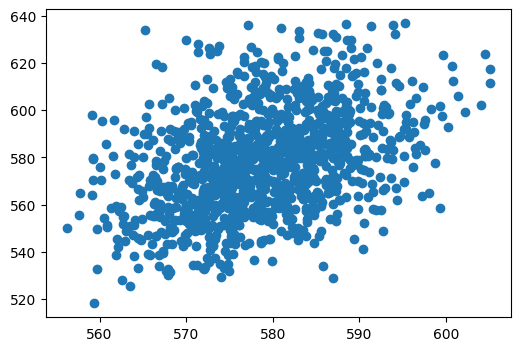

In [ ]:
plt.scatter(regressor.predict(X_test), y_test)

## QISKIT VQR

In [ ]:
pip install qiskit

In [ ]:
# importing necessary packages
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
x = np.array(df["lgE"])

def norm(x: np.ndarray) -> np.ndarray:
    return x / np.sqrt(np.sum(x ** 2))

np.sum(norm(x)**2)

0.9999999999999999

In [ ]:
N = len(x)
nqubits = math.ceil(np.log2(N))
nqubits

17

In [ ]:
vec = np.concatenate((x,y))/np.sqrt(2)    # concatenate x and y as above, with renormalisation
np.linalg.norm(np.array(df["Xmax"]))

188086.89909371818

In [ ]:
x = np.array(df["lgE"])
y = np.array(df["Xmax"])

def norm(x: np.ndarray) -> np.ndarray:
    return x / np.sqrt(np.sum(x ** 2))

x=norm(x)
np.sum(df["Xmax"])

48943297.94365

quitamos la ultima fila del dataframe porque contenia un valor nan en la columna Xmax, lo que nos impedia normalizar esta columna.

In [ ]:
indice_ultima_fila = df.index[-1]
df = df.drop(indice_ultima_fila)
df.tail()

,Unnamed: 0,lgE,Xmax
68210,69994,18.456402,745.4763
68211,69995,18.393509,719.0263
68212,69996,18.555067,699.1325
68213,69997,18.499010,729.9548
68214,69998,18.429500,777.0291


forma 1

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

x = np.array(df["lgE"])
y = np.array(df["Xmax"])

N = len(x)
nqubits_x = math.ceil(np.log2(N))
nqubits_y = math.ceil(np.log2(N))

# Calcular las normas de x e y
xnorm = np.linalg.norm(x)
ynorm = np.linalg.norm(y)

# Normalizar los vectores x e y
x = x / xnorm
y = y / ynorm

# Crear el circuito cuántico con suficientes qubits
circ = QuantumCircuit(max(nqubits_x, nqubits_y) + 1)

# Crear los vectores concatenados y normalizados
vec = np.concatenate((x, y)) / np.sqrt(2)

# Inicializar el estado cuántico en el circuito
circ.initialize(vec, range(len(vec)))

# Aplicar Hadamard al último qubit
circ.h(max(nqubits_x, nqubits_y))

# Dibujar el circuito
circ.draw()


QiskitError: ignored

forma 2

In [ ]:
x = np.array(df["lgE"])
y = np.array(df["Xmax"])


N = len(x)
nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y

xnorm = np.linalg.norm(x)          # normalise vectors x and y
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm

circ = QuantumCircuit(nqubits+1)   # create circuit
vec = np.concatenate((x,y))/np.sqrt(2)    # concatenate x and y as above, with renormalisation

circ.initialize(vec, range(nqubits+1))
circ.h(nqubits)                    # apply hadamard to bottom qubit

circ.draw()                        # draw the circuit

QiskitError: ignored

In [ ]:
nqubits

17

In [ ]:
#Creates a quantum circuit to calculate the inner product between two normalised vectors

def inner_prod(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')

    circ = QuantumCircuit(nqubits+1)
    vec = np.concatenate((vec1,vec2))/np.sqrt(2)

    circ.initialize(vec, range(nqubits+1))
    circ.h(nqubits)

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend, backend_options = {"zero_threshold": 1e-20})

    result = job.result()
    o = np.real(result.get_statevector(circ))

    m_sum = 0
    for l in range(N):
        m_sum += o[l]**2

    return 2*m_sum-1

x = np.arange(0,8,1)
y = x

N = len(x)
nqubits = math.ceil(np.log2(N))
xnorm = np.linalg.norm(x)
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm

print("x: ", x)
print()
print("y: ", y)
print()
print("The inner product of x and y equals: ", inner_prod(x,y))

In [ ]:
#Implements the entire cost function by feeding the ansatz to the quantum circuit which computes inner products

def calculate_cost_function(parameters):

    a, b = parameters

    ansatz = a*x + b                        # compute ansatz
    ansatzNorm = np.linalg.norm(ansatz)     # normalise ansatz
    ansatz = ansatz/ansatzNorm

    y_ansatz = ansatzNorm/ynorm * inner_prod(y,ansatz)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors
    return (1-y_ansatz)**2

x = np.arange(0,8,1)
y = x

N = len(x)
nqubits = math.ceil(np.log2(N))
ynorm = np.linalg.norm(y)
y = y/ynorm

a = 1.0
b = 1.0
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b]))

In [ ]:
#first set up the data sets x and y

x = np.arange(0,8,1)
y = x   # + [random.uniform(-1,1) for p in range(8)]    # can add noise here
N = len(x)
nqubits = math.ceil(np.log2(N))

ynorm = np.linalg.norm(y)      # normalise the y data set
y = y/ynorm

x0 = [0.5,0.5]                 # initial guess for a and b

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

out_a1 = out1['x'][0]
out_b1 = out1['x'][1]

out_a = out['x'][0]
out_b = out['x'][1]

out_a2 = out2['x'][0]
out_b2 = out2['x'][1]

out_a3 = out3['x'][0]
out_b3 = out3['x'][1]

out_a4 = out4['x'][0]
out_b4 = out4['x'][1]

plt.scatter(x,y*ynorm)
xfit = np.linspace(min(x), max(x), 100)
plt.plot(xfit, out_a*xfit+out_b, label='BFGS')
plt.plot(xfit, out_a1*xfit+out_b1, label='COBYLA')
plt.plot(xfit, out_a2*xfit+out_b2, label='Nelder-Mead')
plt.plot(xfit, out_a3*xfit+out_b3, label='CG')
plt.plot(xfit, out_a4*xfit+out_b4, label='trust-constr')
plt.legend()
plt.title("y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()